<a href="https://colab.research.google.com/github/IG-Reagan/Cheese-Yield-Prediction-Using-Predictive-Analytics-and-Machine-Learning/blob/main/KTP_Project_Cheese_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KTP BFC ML Model to Predict Cheese Yield

The aim of this work is to use the Butlers Farmhouse Cheeses make data to train a model that will be able to predict cheese yields based on factors from the cheesemaking process. Butlers cheese making process involves the transformation of milk into cheese. Over 10 different types of cheeses are produced by Butlers, however one batch of milk (in the vat) can be transformed into one type of cheese at a time. The cheesemake data is obtained by recording different meter readings, temperature readings, application time of various ingredients, and other factors from different stages in the cheesemaking process into a database system. Since data is collected and logged in by the production crew, we cannot rule out issues with data quality such as approximations or errors.

The objective of the model at this stage would be to identify the factors that determine the yield and then determine their significance

#### Import Python Packages and Cheese Make Dataset

In [ ]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import set_config
sns.set_theme(style="darkgrid")
%matplotlib inline

In [ ]:
# load the dataset
cheese_data = pd.read_csv(r'Cheesemake_dataset_v3.5.1.csv')

In [ ]:
# print the top few rows of the table
cheese_data.head(3)

,batch_id,prod_date,prod_time,batchnum,run_num,vat_vol,product_category,cheese_type,3am_temp,9am_temp,...,bt_temp_end,rennet2brine_time,mill_ph,mill_duration,knock_out_ph,wrap_ph,wrap_temp,cheese_weight,yield,grade
0,1,19/10/2022,19/10/2022 09:40,20221019,229212,17K,Blue Cheese,STRA,18.7,20.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,19/10/2022,19/10/2022 07:40,20221019,229201,10K,Territorial Cheese,Bisham Foods Creamy,18.7,20.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,19/10/2022,19/10/2022 04:45,20221019,229211,17K,Blue Cheese,BSB,18.7,20.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
cheese_data.shape

(3529, 85)

In [ ]:
# Create a dataset for target variable 'grades', so remove all rows without cheesegrades

cheeseyield_data = cheese_data[cheese_data['yield'].notnull()]
cheeseyield_data.head(3)

,batch_id,prod_date,prod_time,batchnum,run_num,vat_vol,product_category,cheese_type,3am_temp,9am_temp,...,bt_temp_end,rennet2brine_time,mill_ph,mill_duration,knock_out_ph,wrap_ph,wrap_temp,cheese_weight,yield,grade
9,10,17/10/2022,17/10/2022 02:00,20221017,229001,12K,Territorial Cheese,CRMY,19.1,20.7,...,NaN,NaN,5.29,32.0,5.22,NaN,NaN,1519.00,126.58,0
10,11,14/10/2022,14/10/2022 07:40,20221014,228702,10K,Territorial Cheese,CRBLY,18.8,22.3,...,NaN,NaN,5.01,75.0,4.71,NaN,NaN,1662.66,144.51,0
11,12,14/10/2022,14/10/2022 04:30,20221014,228701,12K,Territorial Cheese,CRBLY,18.8,22.3,...,NaN,NaN,4.89,121.0,4.68,NaN,NaN,1529.92,127.49,89


In [ ]:
cols_to_drop = ['batchnum', 'run_num']
cheeseyield_data = cheeseyield_data.drop(cols_to_drop, axis=1)
cheeseyield_data.head(3)

,batch_id,prod_date,prod_time,vat_vol,product_category,cheese_type,3am_temp,9am_temp,3pm_temp,vat_fill_start_time,...,bt_temp_end,rennet2brine_time,mill_ph,mill_duration,knock_out_ph,wrap_ph,wrap_temp,cheese_weight,yield,grade
9,10,17/10/2022,17/10/2022 02:00,12K,Territorial Cheese,CRMY,19.1,20.7,21.2,17/10/2022 02:00,...,NaN,NaN,5.29,32.0,5.22,NaN,NaN,1519.00,126.58,0
10,11,14/10/2022,14/10/2022 07:40,10K,Territorial Cheese,CRBLY,18.8,22.3,21.9,14/10/2022 06:35,...,NaN,NaN,5.01,75.0,4.71,NaN,NaN,1662.66,144.51,0
11,12,14/10/2022,14/10/2022 04:30,12K,Territorial Cheese,CRBLY,18.8,22.3,21.9,14/10/2022 03:00,...,NaN,NaN,4.89,121.0,4.68,NaN,NaN,1529.92,127.49,89


In [ ]:
#check the shape of the dataset or table (i.e. number of columns and rows)
cheeseyield_data.shape

(3096, 83)

#### Exploratory Data Analysis (EDA) - Univariate

In [ ]:
# view columns info sorted by Non-null values count

cheeseyield_data[cheeseyield_data.notna().sum().sort_values().index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 9 to 3225
Data columns (total 83 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rennet2cover_time      34 non-null     float64
 1   turn4_ph               407 non-null    float64
 2   bt_Ba_start            417 non-null    float64
 3   bt_pH_start            417 non-null    float64
 4   bt_temp_start          420 non-null    float64
 5   turn4_acidity          453 non-null    float64
 6   turn4_time             455 non-null    object 
 7   culture_code_2         679 non-null    object 
 8   pitch_duration_time    870 non-null    float64
 9   wrap_temp              953 non-null    float64
 10  wrap_ph                953 non-null    float64
 11  bt_pH_end              989 non-null    float64
 12  bt_Ba_end              1005 non-null   float64
 13  cheese_ph_at_brine     1010 non-null   float64
 14  bt_temp_end            1013 non-null   float64
 15  demo

In [ ]:
cheeseyield_data.columns

Index(['batch_id', 'prod_date', 'prod_time', 'vat_vol', 'product_category',
       'cheese_type', '3am_temp', '9am_temp', '3pm_temp',
       'vat_fill_start_time', 'ltr_milk_total', 'fat_pct_total',
       'prt_pct_total', 'prt_fat_ratio', 'anat_qty', 'mould_qty',
       'culture_code_1', 'culture_qty_1', 'culture_code_2', 'culture_qty_2',
       'culture_time', 'rennet_qty', 'rennet_time', 'rennet_temp', 'rennet_ta',
       'rennet_ph', 'floc_duration', 'cut_time', 'hardn_ratio',
       'scald_start_time', 'scald_end_time', 'scald_temp', 'pitch_ta',
       'pitch_ph', 'temp_at_pitch', 'pitch_start_time', 'pitch_end_time',
       'pitch_duration_time', 'afe_fill_height_start', 'afe_fill_height_end',
       'drainer_vol', 'turned_at_whey_off', 'turn1_time', 'turn1_acidity',
       'turn1_ph', 'turn1_temp', 'turn2_time', 'turn2_acidity', 'turn2_ph',
       'turn3_time', 'turn3_acidity', 'turn3_ph', 'turn4_time',
       'turn4_acidity', 'turn4_ph', 'rennet2cover_time', 'salt_time',
      

In [ ]:
# list of columns with numerical variables
cheeseyield_data.select_dtypes(exclude=['object']).columns

Index(['batch_id', '3am_temp', '9am_temp', '3pm_temp', 'ltr_milk_total',
       'fat_pct_total', 'prt_pct_total', 'prt_fat_ratio', 'anat_qty',
       'mould_qty', 'culture_qty_1', 'culture_qty_2', 'rennet_qty',
       'rennet_temp', 'rennet_ta', 'rennet_ph', 'floc_duration', 'hardn_ratio',
       'scald_temp', 'pitch_ta', 'pitch_ph', 'temp_at_pitch',
       'pitch_duration_time', 'afe_fill_height_start', 'afe_fill_height_end',
       'turn1_acidity', 'turn1_ph', 'turn1_temp', 'turn2_acidity', 'turn2_ph',
       'turn3_acidity', 'turn3_ph', 'turn4_acidity', 'turn4_ph',
       'rennet2cover_time', 'salt_acidity', 'salt_qty', 'rennet_to_salt',
       'demould_ph', 'demould_temp', 'brine_tank', 'brine_duration',
       'cheese_ph_at_brine', 'bt_Ba_start', 'bt_Ba_end', 'bt_pH_start',
       'bt_pH_end', 'bt_temp_start', 'bt_temp_end', 'rennet2brine_time',
       'mill_ph', 'mill_duration', 'knock_out_ph', 'wrap_ph', 'wrap_temp',
       'cheese_weight', 'yield', 'grade'],
      dtype='object

In [ ]:
# list of columns with categorical variables
cheeseyield_data.select_dtypes(include=['object']).columns

Index(['prod_date', 'prod_time', 'vat_vol', 'product_category', 'cheese_type',
       'vat_fill_start_time', 'culture_code_1', 'culture_code_2',
       'culture_time', 'rennet_time', 'cut_time', 'scald_start_time',
       'scald_end_time', 'pitch_start_time', 'pitch_end_time', 'drainer_vol',
       'turned_at_whey_off', 'turn1_time', 'turn2_time', 'turn3_time',
       'turn4_time', 'salt_time', 'demould_time', 'brine_in_time',
       'brine_out_time'],
      dtype='object')

In [ ]:
cheeseyield_data['product_category'].unique()

array(['Territorial Cheese', 'Blue Cheese'], dtype=object)

In [ ]:
cheeseyield_data['cheese_type'].unique().tolist()

['CRMY',
 'CRBLY',
 'SN',
 'BSB',
 'STRA',
 'Parlick',
 'DG',
 'BEAC',
 'RL',
 'CHED',
 'TRAD',
 'Mild Cheddar',
 'Bisham Foods Creamy']

In [ ]:
cheeseyield_data['vat_vol'].unique()

array(['12K', '10K', '17K'], dtype=object)

In [ ]:
def plot_counts(
    df, col, ylabel, title, hue=None, figsize=(6,4), orient='v', filename=None
):
    # Plot counts of a column in a DataFrame
    fig, ax = plt.subplots(figsize=figsize)
    df_fill_na = df.fillna(value={col: "missing"})
    if orient == 'v':
        ax = sns.countplot(
            y=col, orient='v', data=df_fill_na, hue=hue,
#             order=df_fill_na[col].value_counts().index
        )
    else:
        ax = sns.countplot(
            x=col, orient='h', data=df_fill_na, hue=hue,
#             order=df_fill_na[col].value_counts().index
        )
    ax.set(xlabel='Count', ylabel=ylabel, title=title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    total = len(df)
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(h, ((p.get_x() + p.get_width()/2.0)-0.225, h+5))

    plt.subplots_adjust(bottom=0.25, left=0.25)
#    if filename:
#       filepath = f'vis/{filename}.png'
#       plt.savefig(filepath, dpi=300)
    plt.show()

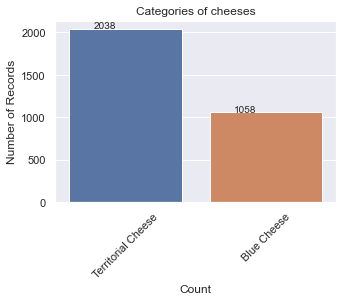

In [ ]:
# Bar char distribution of cheesemake categories:

plot_counts(
    df=cheeseyield_data, col='product_category', ylabel='Number of Records',
    title='Categories of cheeses', orient='h', filename='product_cat_count'
)

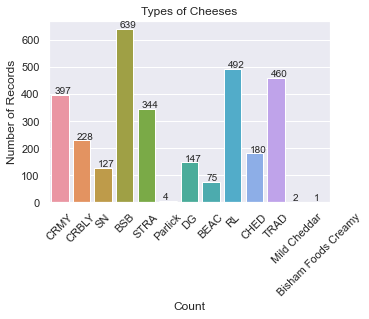

In [ ]:
# Bar char distribution of cheese type:

plot_counts(
    df=cheeseyield_data, col='cheese_type', ylabel='Number of Records',
    title='Types of Cheeses', orient='h', filename='cheese_type_count'
)

In [ ]:
# Rename Mild Cheddar as MLD_CHED
cheeseyield_data = cheeseyield_data.replace('Mild Cheddar', 'MLD_CHED')

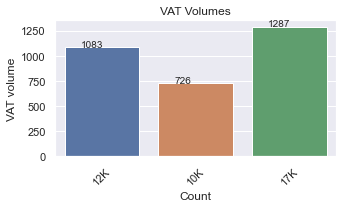

In [ ]:
# Bar char distribution of vat vol used:

plot_counts(
    df=cheeseyield_data, col='vat_vol', ylabel='VAT volume',
    title='VAT Volumes', orient='h', figsize=(6,3), filename='vat_vol_counts'
)

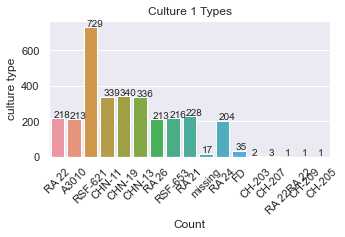

In [ ]:
# Bar char distribution of culture type used:

plot_counts(
    df=cheeseyield_data, col='culture_code_1', ylabel='culture type',
    title='Culture 1 Types', orient='h', figsize=(6,3), filename='culture1_type_counts'
)

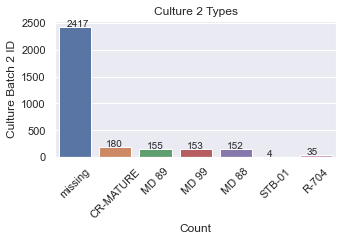

In [ ]:
# Bar char distribution of second culture type used where applicable:
# missing values represent cheese types that do not require 2 culture

plot_counts(
    df=cheeseyield_data, col='culture_code_2', ylabel='Culture Batch 2 ID',
    title='Culture 2 Types', orient='h', figsize=(6,3), filename='culture2_type_counts'
)

In [ ]:
cheeseyield_data['yield'].unique().tolist()

[126.58,
 144.51,
 127.49,
 131.13,
 93.71,
 116.86,
 133.35,
 137.23,
 196.7,
 135.17,
 129.58,
 104.95,
 133.1,
 127.31,
 129.7,
 133.71,
 134.01,
 116.67,
 127.11,
 124.47,
 133.37,
 138.64,
 130.14,
 93.89,
 137.08,
 139.55,
 134.3,
 137.68,
 131.35,
 127.94,
 131.6,
 232.23,
 129.89,
 133.03,
 149.77,
 109.82,
 133.78,
 136.95,
 131.04,
 135.35,
 131.44,
 131.86,
 130.67,
 130.7,
 129.77,
 105.2,
 103.14,
 123.84,
 130.98,
 126.52,
 112.96,
 132.7,
 150.31,
 140.77,
 133.21,
 131.49,
 130.01,
 131.41,
 130.55,
 128.73,
 126.73,
 125.34,
 127.5,
 126.41,
 98.02,
 127.45,
 130.07,
 128.21,
 127.19,
 127.15,
 95.81,
 123.92,
 125.82,
 122.56,
 121.29,
 205.8,
 124.15,
 123.12,
 119.22,
 83.56,
 123.2,
 114.98,
 122.14,
 125.64,
 106.29,
 126.97,
 113.61,
 87.31,
 128.58,
 110.41,
 125.19,
 103.09,
 203.5,
 126.5,
 106.97,
 120.48,
 110.1,
 86.16,
 124.81,
 107.87,
 111.05,
 105.95,
 111.26,
 112.13,
 100.98,
 82.12,
 102.1,
 109.21,
 112.1,
 121.46,
 125.33,
 108.24,
 117.76,
 103.69

In [ ]:
# cheeseyield_data['yield'] = cheeseyield_data['yield'].replace(90, '90')
# cheeseyield_data['yield'] = cheeseyield_data['yield'].replace(89, '89')
# cheeseyield_data['yield'] = cheeseyield_data['yield'].replace(88, '88')
# cheeseyield_data['yield'] = cheeseyield_data['yield'].replace(87, '87')

In [ ]:
# cheeseyield_data['yield'] = cheeseyield_data['yield'].replace('90', 90)
# cheeseyield_data['yield'] = cheeseyield_data['yield'].replace('89', 89)
# cheeseyield_data['yield'] = cheeseyield_data['yield'].replace('88', 88)
# cheeseyield_data['yield'] = cheeseyield_data['yield'].replace('87', 87)

Text(0.5, 0.98, 'Distribution of numberical variables')

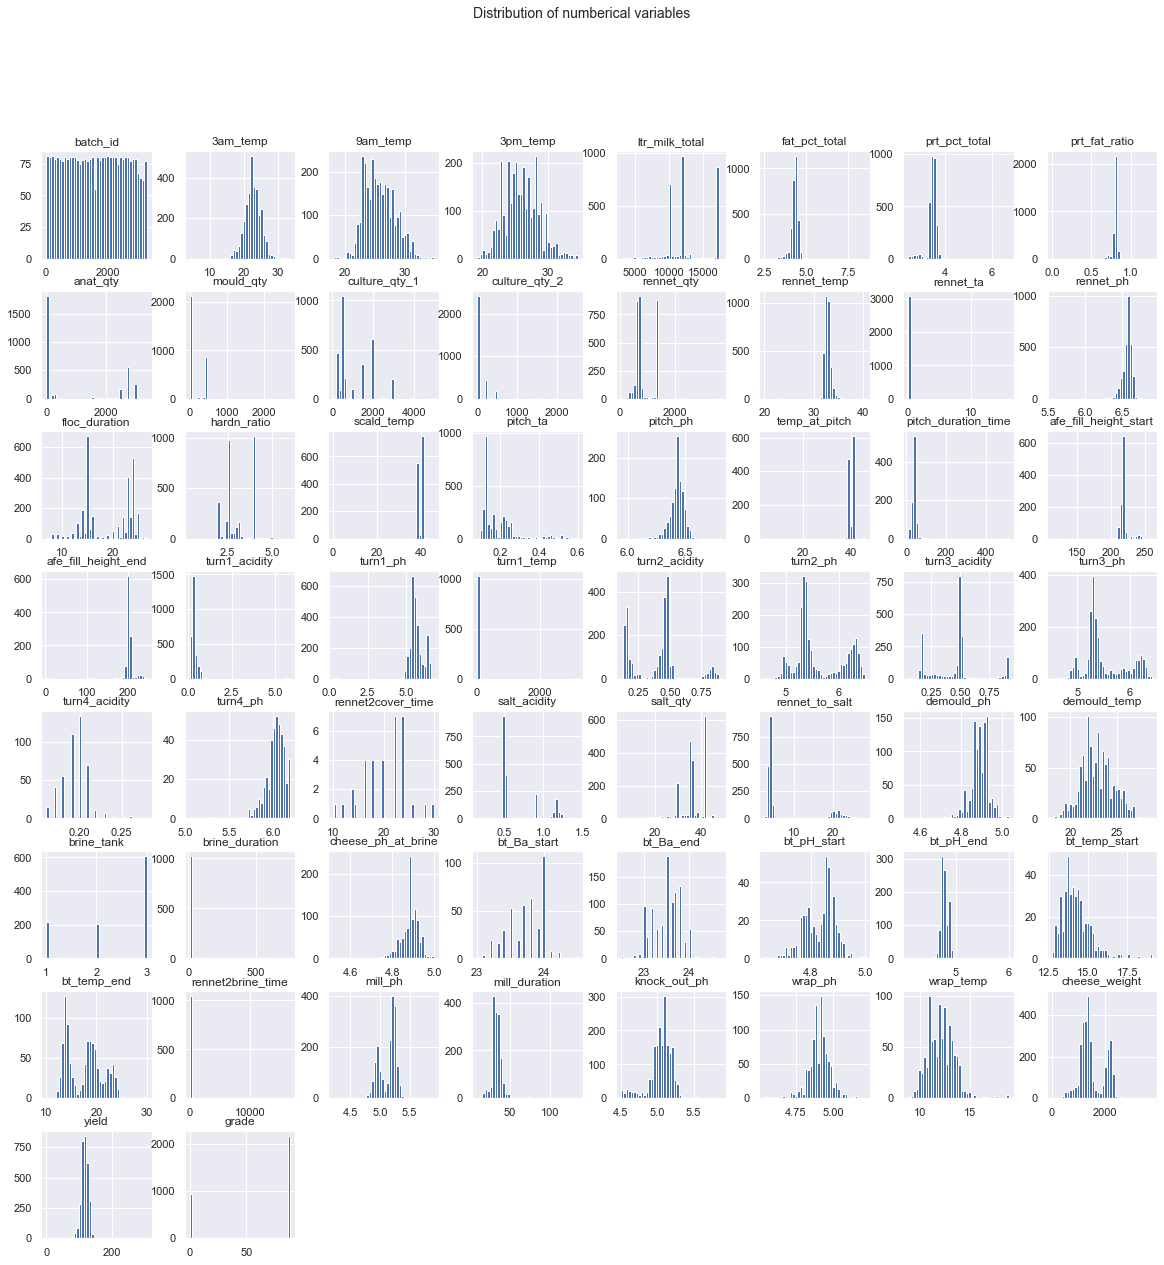

In [ ]:
#plot histogram for all numeric variables in the dataset

#Commenting below out due to slow execution - run if needed
dummy = cheeseyield_data.hist(bins=40, figsize=(20,20))
plt.suptitle("Distribution of numberical variables", fontsize=(14))

##### Exploring the Target Variable - 'yield'


In [ ]:
# # Bar char distribution of cheese grades:

# plot_counts(
#     df=cheeseyield_data, col='yield', ylabel='Cheese Grade',
#     title='Distribution of Cheese Grades', orient='h', figsize=(6,3), filename='cheese_grade_dist'
# )

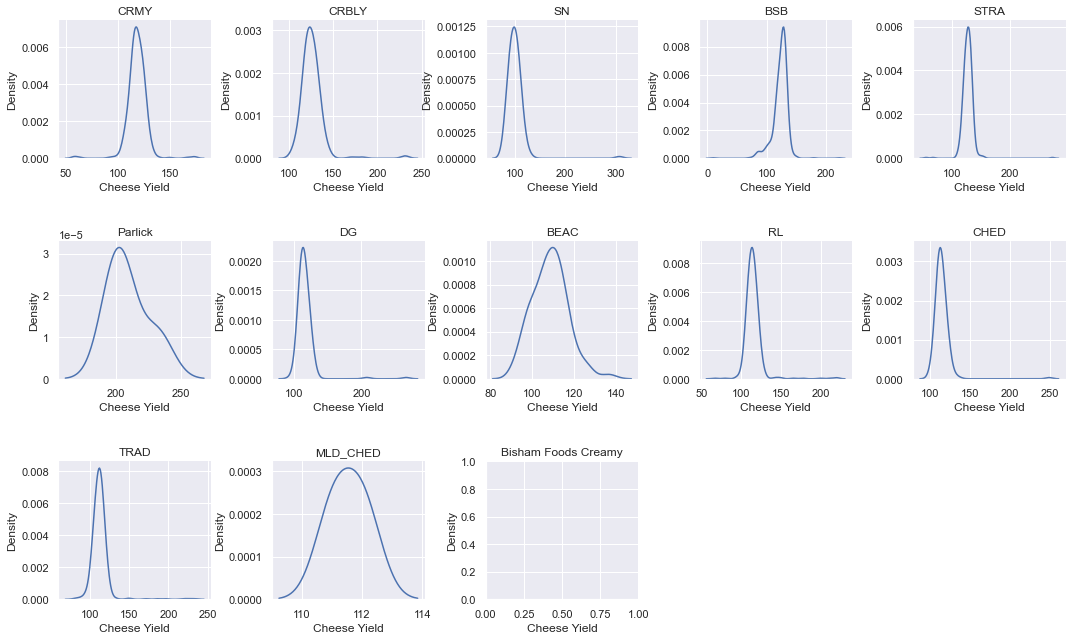

In [ ]:
# Distribution of grades by cheese product
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

g = sns.displot(
    data=cheeseyield_data[cheeseyield_data['yield']<1000],
    x='yield', col='cheese_type', col_wrap=5,
    kind="kde", height=3, facet_kws=dict(sharex=False, sharey=False)
)

g.set_titles("{col_name}")
g.set(xlabel='Cheese Yield', ylabel='Density')
plt.subplots_adjust(hspace=0.6, wspace=0.4)
#plt.savefig('vis/yield_distribution_kde_all.png', dpi=300)
plt.show()

In [ ]:
cheeseyield_data.columns

Index(['batch_id', 'prod_date', 'prod_time', 'vat_vol', 'product_category',
       'cheese_type', '3am_temp', '9am_temp', '3pm_temp',
       'vat_fill_start_time', 'ltr_milk_total', 'fat_pct_total',
       'prt_pct_total', 'prt_fat_ratio', 'anat_qty', 'mould_qty',
       'culture_code_1', 'culture_qty_1', 'culture_code_2', 'culture_qty_2',
       'culture_time', 'rennet_qty', 'rennet_time', 'rennet_temp', 'rennet_ta',
       'rennet_ph', 'floc_duration', 'cut_time', 'hardn_ratio',
       'scald_start_time', 'scald_end_time', 'scald_temp', 'pitch_ta',
       'pitch_ph', 'temp_at_pitch', 'pitch_start_time', 'pitch_end_time',
       'pitch_duration_time', 'afe_fill_height_start', 'afe_fill_height_end',
       'drainer_vol', 'turned_at_whey_off', 'turn1_time', 'turn1_acidity',
       'turn1_ph', 'turn1_temp', 'turn2_time', 'turn2_acidity', 'turn2_ph',
       'turn3_time', 'turn3_acidity', 'turn3_ph', 'turn4_time',
       'turn4_acidity', 'turn4_ph', 'rennet2cover_time', 'salt_time',
      

In [ ]:
# Convert prod_date from str to standard datetime
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

cheeseyield_data['prod_date'] = pd.to_datetime(cheeseyield_data['prod_date'], infer_datetime_format=True)
cheeseyield_data.prod_date.head(5)

9    2022-10-17
10   2022-10-14
11   2022-10-14
12   2022-10-13
13   2022-10-13
Name: prod_date, dtype: datetime64[ns]

In [ ]:
# Extract the month from the full datetime

cheeseyield_data['prod_month'] = cheeseyield_data['prod_date'].dt.month
cheeseyield_data.prod_month.head(5)

9     10
10    10
11    10
12    10
13    10
Name: prod_month, dtype: int64

In [ ]:
# extract the year from the full date and time

cheeseyield_data['prod_year'] = cheeseyield_data['prod_date'].dt.year
cheeseyield_data.prod_year.head(5)

9     2022
10    2022
11    2022
12    2022
13    2022
Name: prod_year, dtype: int64

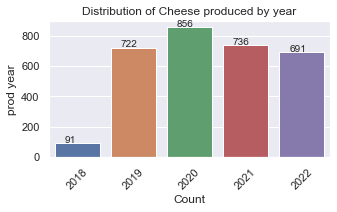

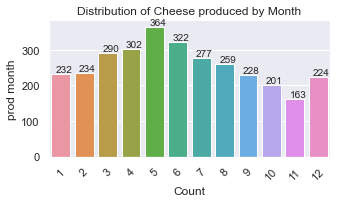

In [ ]:
# Plot the volume of production by year

plot_counts(
    df=cheeseyield_data, col='prod_year', ylabel='prod year',
    title='Distribution of Cheese produced by year', orient='h', figsize=(6,3), filename='cheese_prod_year_dist'
)

# Plot the volume of production by month

plot_counts(
    df=cheeseyield_data, col='prod_month', ylabel='prod month',
    title='Distribution of Cheese produced by Month', orient='h', figsize=(6,3), filename='cheese_prod_month_dist'
)

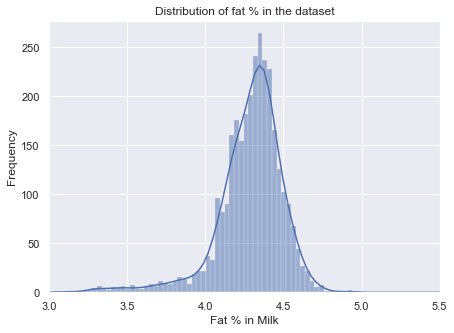

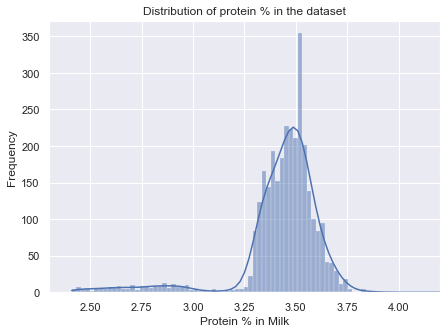

In [ ]:
# Distribution of target variable (cheese grade)
plt.figure(figsize=(7, 5))

g = sns.histplot(data=cheeseyield_data, x="fat_pct_total", kde=True)
g.set(title="Distribution of fat % in the dataset", xlabel='Fat % in Milk', ylabel='Frequency', xlim=(3, 5.5))
plt.show()

plt.figure(figsize=(7, 5))
g = sns.histplot(data=cheeseyield_data, x="prt_pct_total", kde=True)
g.set(title="Distribution of protein % in the dataset", xlabel='Protein % in Milk', ylabel='Frequency', xlim=(2.3, 4.2))
plt.show()

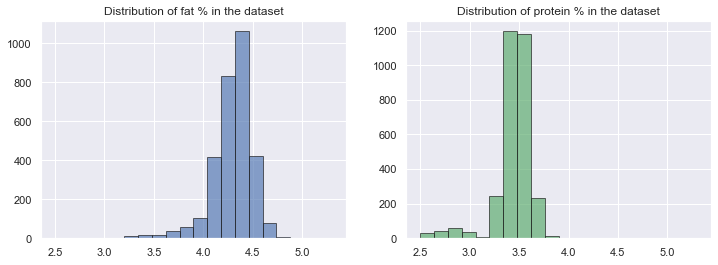

In [ ]:
#Distribution of fat and protein percentage

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.hist(cheeseyield_data['fat_pct_total'], bins=20, color='b', edgecolor='k', alpha=0.65, range=(2.5, 5.3))
plt.title("Distribution of fat % in the dataset")

plt.subplot(1, 2, 2) # index 2
plt.hist(cheeseyield_data['prt_pct_total'], bins=20, color='g', edgecolor='k', alpha=0.65, range=(2.5, 5.3))
plt.title("Distribution of protein % in the dataset")

plt.show()

In [ ]:
cheeseyield_data.cheese_type.unique()

array(['CRMY', 'CRBLY', 'SN', 'BSB', 'STRA', 'Parlick', 'DG', 'BEAC',
       'RL', 'CHED', 'TRAD', 'MLD_CHED', 'Bisham Foods Creamy'],
      dtype=object)

In [ ]:
# Extract a table with only cheeses made from cows milk
cowsmilk = ['CRBLY', 'DG', 'BSB', 'STRA', 'TRAD', 'CRMY', 'RL', 'CHED', 'MLD_CHED']
df_cowsmilk = cheeseyield_data[cheeseyield_data.cheese_type.isin (cowsmilk)]
# df_cowsmilk.head(3)

# Extract a table with only cheeses made from goats milk
goatsmilk = ['BEAC', 'SN']
df_goatsmilk = cheeseyield_data[cheeseyield_data.cheese_type.isin (goatsmilk)]
# df_goatsmilk.head(3)

In [ ]:
df_cowsmilk.shape

(2889, 85)

In [ ]:
df_goatsmilk.shape

(202, 85)

Text(0.5, 1.0, 'Cows milk protein % distribtion')

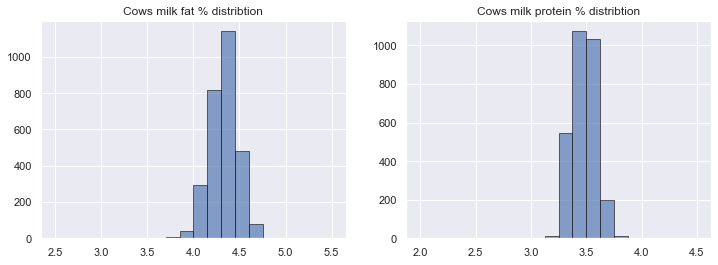

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.hist(df_cowsmilk['fat_pct_total'], bins=20, color='b', edgecolor='k', alpha=0.65, range=[2.5, 5.5])
plt.title('Cows milk fat % distribtion')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.hist(df_cowsmilk['prt_pct_total'], bins=20, color='b', edgecolor='k', alpha=0.65, range=[2, 4.5])
plt.title('Cows milk protein % distribtion')

Text(0.5, 1.0, 'Goats milk protein % distribtion')

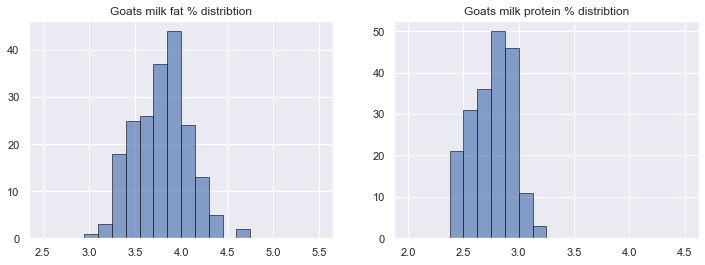

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) # row 1, col 2 index 2
plt.hist(df_goatsmilk['fat_pct_total'], bins=20, color='b', edgecolor='k', alpha=0.65, range=[2.5, 5.5])
plt.title('Goats milk fat % distribtion')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.hist(df_goatsmilk['prt_pct_total'], bins=20, color='b', edgecolor='k', alpha=0.65, range=[2, 4.5])
plt.title('Goats milk protein % distribtion')

##### Multivariate Data Exploration betweeen Independent Variables

Text(0.5, 1.0, 'Distribution of protein content by cheese type')

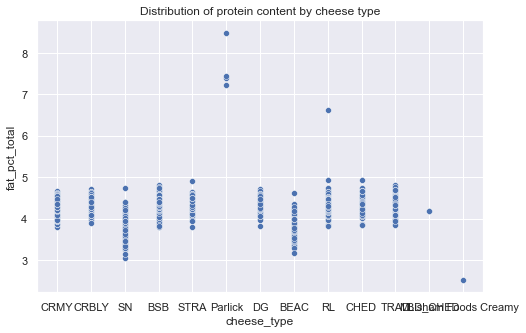

In [ ]:
# Scatter plot of fat content by cheese type
plt.figure(figsize=(8, 5))
sns.scatterplot(y=cheeseyield_data['fat_pct_total'], x=cheeseyield_data['cheese_type'])
plt.title("Distribution of protein content by cheese type")

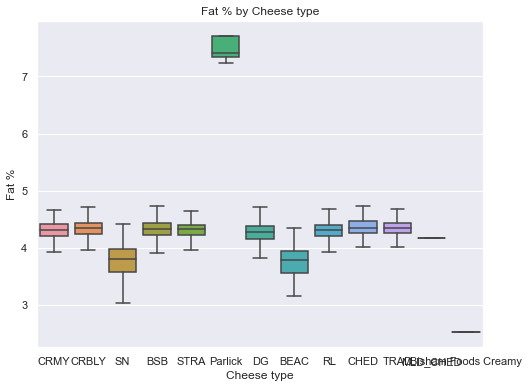

In [ ]:
# Check fat % by cheese type

plt.figure(figsize=(8, 6))
sns.boxplot(x='cheese_type', y='fat_pct_total', data=cheeseyield_data, showfliers=False)
plt.ylabel("Fat %")
plt.xlabel("Cheese type")
plt.title("Fat % by Cheese type")
plt.show()

Text(0.5, 1.0, 'Distribution of protein content by cheese type')

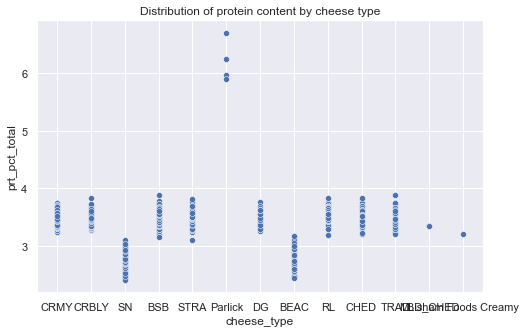

In [ ]:
# Scatter plot of protein content by cheese type

plt.figure(figsize=(8, 5))
sns.scatterplot(y=cheeseyield_data['prt_pct_total'], x=cheeseyield_data['cheese_type'])
plt.title("Distribution of protein content by cheese type")

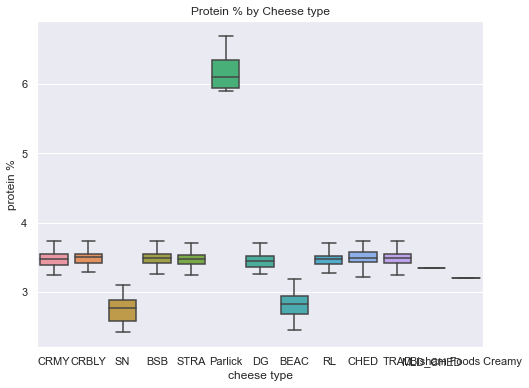

In [ ]:
# Check protein % by cheese type

plt.figure(figsize=(8, 6))
sns.boxplot(x='cheese_type', y='prt_pct_total', data=cheeseyield_data, showfliers=False)
plt.ylabel("protein %")
plt.xlabel("cheese type")
plt.title("Protein % by Cheese type")
plt.show()

Text(0.5, 1.0, 'Fat and protein content in milk shows a linear relationship')

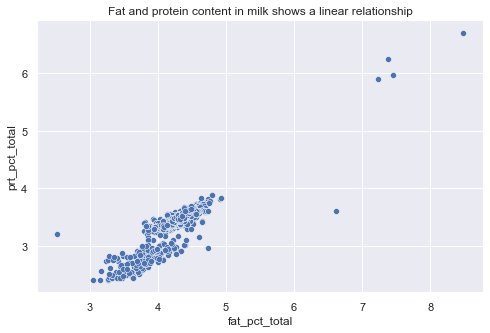

In [ ]:
# Check the relationship between Fat to Protein % for the dataset

plt.figure(figsize=(8, 5))
sns.scatterplot(x=cheeseyield_data['fat_pct_total'], y=cheeseyield_data['prt_pct_total'])
plt.title("Fat and protein content in milk shows a linear relationship")

Text(0, 0.5, 'cheese type')

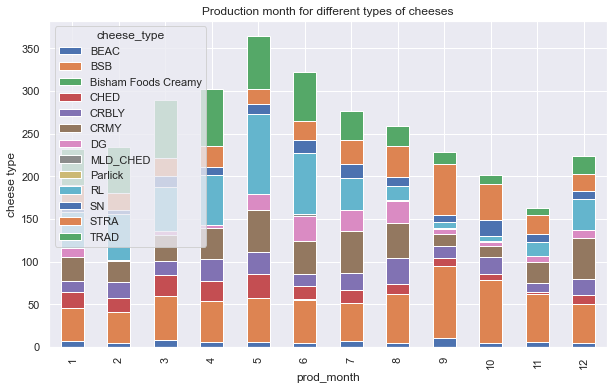

In [ ]:
cheeseyield_data.groupby(['prod_month','cheese_type']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,6))
plt.title('Production month for different types of cheeses')
plt.ylabel('cheese type')

##### Multivariate Visualisations between Independent vs. Dependent Var

Text(0.5, 1.0, 'Fat content vs. cheese yield')

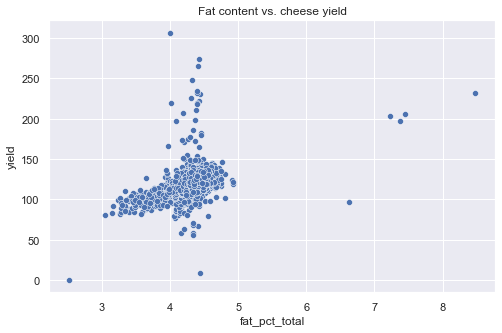

In [ ]:
# Check how fat content of milk impacts the cheese grade

plt.figure(figsize=(8, 5))
sns.scatterplot(x=cheeseyield_data['fat_pct_total'], y=cheeseyield_data['yield'])
plt.title("Fat content vs. cheese yield")

Text(0.5, 1.0, 'Protein content vs. cheese yield')

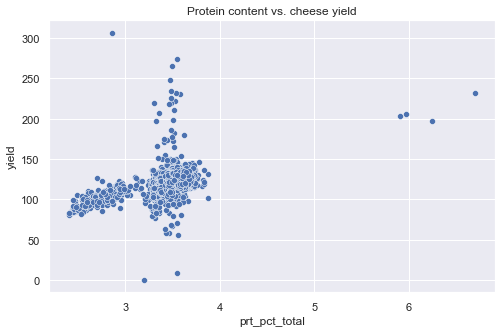

In [ ]:
# Check how protein content of milk impacts the cheese grade

plt.figure(figsize=(8, 5))
sns.scatterplot(x=cheeseyield_data['prt_pct_total'], y=cheeseyield_data['yield'])
plt.title("Protein content vs. cheese yield")

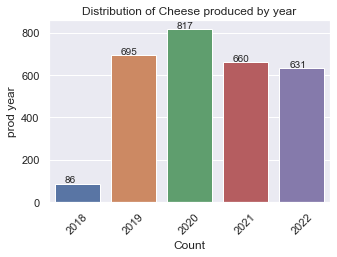

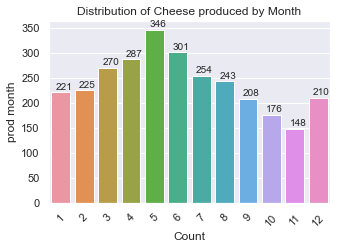

In [ ]:
# Plot the volume of production by year

plot_counts(
    df=df_cowsmilk, col='prod_year', ylabel='prod year',
    title='Distribution of Cheese produced by year', orient='h', figsize=(6,4), filename='cheese_prod_year_dist')

# Plot the volume of production by month

plot_counts(
    df=df_cowsmilk, col='prod_month', ylabel='prod month',
    title='Distribution of Cheese produced by Month', orient='h', figsize=(6,4), filename='cheese_prod_month_dist'
)

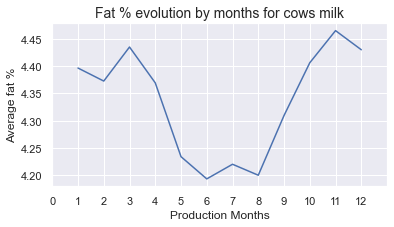

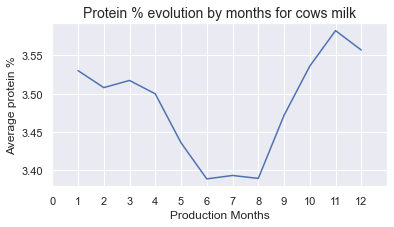

In [ ]:
# Fat % evolution by months
df_cowsmilk_pm = df_cowsmilk.groupby(['prod_month']).mean()
f, ax = plt.subplots(figsize=(6, 3))
ax = sns.lineplot(y='fat_pct_total', x=df_cowsmilk_pm.index, data=df_cowsmilk_pm)
ax.set_title('Fat % evolution by months for cows milk', size=14)
ax.set_xlabel('Production Months')
ax.set_ylabel('Average fat %')
ax.set(xlim=(0, 13), xticks=np.arange(0,13))

plt.show()

# Protein % evolution by months
df_goatsmilk_pm = df_cowsmilk.groupby(['prod_month']).mean()
f, ax = plt.subplots(figsize=(6, 3))
ax = sns.lineplot(y='prt_pct_total', x=df_cowsmilk_pm.index, data=df_cowsmilk_pm)
ax.set_title('Protein % evolution by months for cows milk', size=14)
ax.set_xlabel('Production Months')
ax.set_ylabel('Average protein %')
ax.set(xlim=(0, 13), xticks=np.arange(0,13))

plt.show()

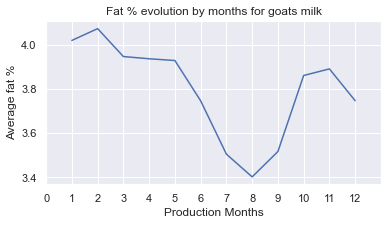

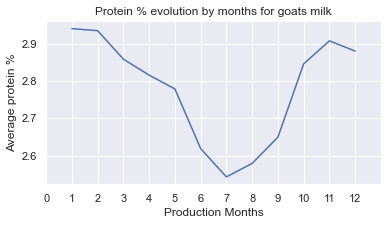

In [ ]:
# Fat % evolution by months
df_goatsmilk_pm = df_goatsmilk.groupby(['prod_month']).mean()
f, ax = plt.subplots(figsize=(6, 3))
ax = sns.lineplot(y='fat_pct_total', x=df_goatsmilk_pm.index, data=df_goatsmilk_pm)
ax.set_title('Fat % evolution by months for goats milk', size=12)
ax.set_xlabel('Production Months')
ax.set_ylabel('Average fat %')
ax.set(xlim=(0, 13), xticks=np.arange(0,13))

plt.show()

# Protein % evolution by months
df_goatsmilk_pm = df_goatsmilk.groupby(['prod_month']).mean()
f, ax = plt.subplots(figsize=(6, 3))
ax = sns.lineplot(y='prt_pct_total', x=df_goatsmilk_pm.index, data=df_goatsmilk_pm)
ax.set_title('Protein % evolution by months for goats milk', size=12)
ax.set_xlabel('Production Months')
ax.set_ylabel('Average protein %')
ax.set(xlim=(0, 13), xticks=np.arange(0,13))

plt.show()

In [ ]:
# Are there Culture types that produce better cheese grades?
cheesegrade_data_cc = cheesegrade_data.groupby(['culture_code_1']).mean()
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(y='grade', x=cheesegrade_data_cc.index, data=cheesegrade_data_cc)
ax.set_title('Plot a. Avg Cheese Grade by Culture Type', size=12)
ax.set_xlabel('culture type')
ax.set_ylabel('cheese grade')
ax.set(ylim=(85, 90), yticks=np.arange(85,90))
plt.show()

# Bar char distribution of culture type used:
plot_counts(
    df=cheesegrade_data, col='culture_code_1', ylabel='culture type',
    title='Plot b. Frequency of Use for Each Culture Type', orient='h', figsize=(9,4), filename='culture1_type_counts'
)

NameError: name 'cheesegrade_data' is not defined

In [ ]:
cheeseyield_data['cheese_type'].unique()

In [ ]:
# Separate the data set by cheese type to analyse effects of different factors on cheese grade per cheese type

# Blue cheeses dataset
blue_cheeses = ['BEAC', 'BSB', 'STRA']
df_blue_cheeses = cheeseyield_data[cheeseyield_data.cheese_type.isin (blue_cheeses)]

#Territorial cheeses dataset
terri_cheeses = ['CRBLY', 'TRAD', 'CRMY', 'DG', 'SN', 'RL', 'CHED', 'MLD_CHED']
df_terri_cheeses = cheeseyield_data[cheeseyield_data.cheese_type.isin (terri_cheeses)]

# Individual blue cheeses dataset
beacon_blue = ['BEAC']
df_beacon_blue = cheeseyield_data[cheeseyield_data.cheese_type.isin (beacon_blue)]

blacksticks_blue = ['BSB']
df_blacksticks_blue = cheeseyield_data[cheeseyield_data.cheese_type.isin (blacksticks_blue)]

strat_blue = ['STRA']
df_strat_blue = cheeseyield_data[cheeseyield_data.cheese_type.isin (strat_blue)]


# Individual territorial cheeses dataset
crumbly = ['CRBLY']
df_crumbly = cheeseyield_data[cheeseyield_data.cheese_type.isin (crumbly)]

trad_lancs = ['TRAD']
df_trad_lancs = cheeseyield_data[cheeseyield_data.cheese_type.isin (trad_lancs)]

creamy = ['CRMY']
df_creamy = cheeseyield_data[cheeseyield_data.cheese_type.isin (creamy)]

double_glo = ['DG']
df_double_glo = cheeseyield_data[cheeseyield_data.cheese_type.isin (double_glo)]

sweet_nut = ['SN']
df_sweet_nut = cheeseyield_data[cheeseyield_data.cheese_type.isin (sweet_nut)]

red_lster = ['RL']
df_red_lster = cheeseyield_data[cheeseyield_data.cheese_type.isin (red_lster)]

chedd = ['CHED']
df_chedd = cheeseyield_data[cheeseyield_data.cheese_type.isin (chedd)]

mild_chedd = ['MLD_CHED']
df_mild_chedd = cheeseyield_data[cheeseyield_data.cheese_type.isin (mild_chedd)]

In [ ]:
plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1) #row 1, col 2 index 1plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_blue_cheeses.index, y=df_blue_cheeses['floc_duration'], hue=df_blue_cheeses['cheese_type'])

In [ ]:
plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1) #row 1, col 2 index 1plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_terri_cheeses.index, y=df_terri_cheeses['floc_duration'], hue=df_terri_cheeses['cheese_type'])
plt.title("Scatter plot of floculation duration for territotial cheeses")

In [ ]:
cheeseyield_data.describe().T

In [ ]:
# Visualise correlations between the variables using visualisation
def feature_corr_blue(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(25, 20))

    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
               linewidths=5, cmap=cmap, vmin=-1, vmax=1,
               cbar_kws={"shrink": .8}, square=True)

    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]

    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)

    title = 'Feature Correlation \nBlue Cheeses \n'
    plt.title(title, loc='left', fontsize=18)
    plt.subplots_adjust(bottom=0.25, left=0.25)
    plt.show()

In [ ]:
cols_to_ignore = ['batch_id', 'prod_date', 'prod_time', 'ltr_milk_total','culture_code_2', 'culture_qty_2',
                   'scald_start_time', 'scald_end_time',  'pitch_start_time',
                  'pitch_end_time','pitch_end_time', 'turned_at_whey_off', 'turn2_time',
                  'turn2_ph', 'turn3_time', 'turn3_acidity', 'turn4_time', 'turn4_acidity', 'turn4_ph',
                  'rennet2cover_time', 'salt_time', 'salt_acidity', 'rennet_to_salt', 'brine_in_time', 'brine_out_time',
                  'mill_ph', 'mill_duration', 'knock_out_ph', 'prod_year', 'temp_at_pitch', 'scald_temp', 'salt_qty']

In [ ]:
df_blue_corr = df_blue_cheeses.drop(cols_to_ignore, axis=1)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

feature_corr_blue(df_blue_corr)

In [ ]:
# Visualise correlations between the variables using visualisation
def feature_corr_terri(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(25, 20))

    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
               linewidths=5, cmap=cmap, vmin=-1, vmax=1,
               cbar_kws={"shrink": .8}, square=True)

    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]

    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)

    title = 'Feature Correlation \nTerritorial Cheeses \n'
    plt.title(title, loc='left', fontsize=18)
    plt.subplots_adjust(bottom=0.25, left=0.25)
    plt.show()

In [ ]:
cols_to_ignore = ['batch_id', 'prod_date', 'prod_time', 'product_category', 'anat_qty', 'mould_qty',
                  'pitch_start_time', 'pitch_end_time', 'pitch_end_time',
                  'brine_tank', 'brine_in_time', 'brine_out_time', 'cheese_ph_at_brine',
                  'bt_Ba_start', 'bt_Ba_end', 'bt_pH_start', 'bt_pH_end', 'bt_temp_start',
                  'bt_temp_end', 'rennet2brine_time', 'rennet2brine_time', 'prod_year', 'pitch_ph', 'afe_fill_height_start',
                  'afe_fill_height_end', 'demould_ph', 'demould_temp', 'demould_ph', 'rennet2brine_time', 'wrap_ph', 'wrap_temp', 'brine_duration', 'pitch_duration_time', 'turn1_temp']

In [ ]:
df_terri_corr = df_terri_cheeses.drop(cols_to_ignore, axis=1)

In [ ]:
feature_corr_terri(df_terri_corr)

Check Top 20 Correlated Features with Cheese Grade

In [ ]:
cheeseyield_data.corr()['yield'].sort_values(ascending=False).head(20)

##### Statistical Test of Significance Between Variables

Fist let us check the statistical significance by cheese category (Blue or Territorial Cheeses). The aim is to find out if there is statistical significance in cheese yield between the two categories of cheeses.

In [ ]:
# Blue cheeses dataset
blue_cheeses = ['BEAC', 'BSB', 'STRA']
df_blue_cheeses = cheeseyield_data[cheeseyield_data.cheese_type.isin (blue_cheeses)]
blue_cheeses_yield = df_blue_cheeses.yield

#Territorial cheeses dataset
terri_cheeses = ['CRBLY', 'TRAD', 'CRMY', 'DG', 'SN', 'RL', 'CHED', 'MLD_CHED']
df_terri_cheeses = cheesegrade_yield[cheeseyield_data.cheese_type.isin (terri_cheeses)]
terri_cheeses_yield = df_terri_cheeses.yield

In [ ]:
# Sample from two different normal distributions
means = np.mean(blue_cheeses_yield), np.mean(terri_cheeses_yield)
stdevs = np.std(blue_cheeses_yield), np.std(terri_cheeses_yield)
dist = pd.DataFrame(
     np.random.normal(loc=means, scale=(means), size=(1984, 2)),
     columns=['Blue cheese Yield', 'Territorial Yield'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
dist.plot.kde(ax=ax, legend=False, title='Normal Distribution: Cheese Grade Blue vs. Territorial')
dist.plot.hist(density = True, ax=ax, color = ('blue','green'), alpha = 0.4)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('white')

#Customize the y-axis;
ax.set_yticklabels([])
ax.set_ylabel(" ")

#Remove ticks and spines
ax.tick_params(left = False, bottom = True)
for ax, spine in ax.spines.items():
    spine.set_visible(True)

Above figure shows very similar grade distribution between blue and territorial cheeses, indicating that there is no significant difference between their average grading. Let's also conduct a paired sample t-test to determine whether the difference in means is significant. Null hypotesis is that there is no significant difference between the average (or mean) grading of the cheese categories.

In [ ]:
from scipy import stats

t_val, p_val = stats.ttest_ind(blue_cheeses_grades, terri_cheeses_grades)

if p_val < 0.05:
    print(f"p-val: {p_val} < 0.05. Reject null hypothesis; mean grade btw blue and territorial cheeses is significantly different.")
else:
    print(f"p-val: {p_val} > 0.05. Accept null hypothesis; mean grade btw blue and territorial cheeses is NOT significantly different.")

The same test can also be conducted for the culture types. First we will check the different types of culture used in the cheese making.

In [ ]:
# Check culture types based on culture_code_1

cheesegrade_data.culture_code_1.unique()

In [ ]:
# Are there Culture types that produce better cheese grades?
cheesegrade_data_cc = cheesegrade_data.groupby(['culture_code_1']).mean()
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(y='grade', x=cheesegrade_data_cc.index, data=cheesegrade_data_cc)
ax.set_title('Plot a. Avg Cheese Grade by Culture Type', size=12)
ax.set_xlabel('culture type')
ax.set_ylabel('cheese grade')
ax.set(ylim=(85, 90), yticks=np.arange(85,90))
plt.show()

# Bar char distribution of culture type used:
plot_counts(
    df=cheesegrade_data, col='culture_code_1', ylabel='culture type',
    title='Plot b. Frequency of Use for Each Culture Type', orient='h', figsize=(9,4), filename='culture1_type_counts'
)

The cheese grades are almost uniformly distributed by culture type. We will try to conduct a test between the culture with the highest average grade (RSF-653) vs. that with the lowest average grade (RSF-621).

In [ ]:
#Let us  extract a subset of cheese grade for culture type RSF-653;
cult_RSF_653 = cheesegrade_data[cheesegrade_data.culture_code_1 == 'RSF-653']
cult_RSF_653_grade = cult_RSF_653.grade

#Let us also extract a subset of cheese grade for culture type RSF-621;
cult_RSF_621 = cheesegrade_data[cheesegrade_data.culture_code_1 == 'RSF-621']
cult_RSF_621_grade = cult_RSF_621.grade

In [ ]:
# Sample from two different normal distributions
means = np.mean(cult_RSF_653_grade), np.mean(cult_RSF_621_grade)
stdevs = np.std(cult_RSF_653_grade), np.std(cult_RSF_621_grade)
dist = pd.DataFrame(
     np.random.normal(loc=means, scale=(means), size=(1984, 2)),
     columns=['RSF-653 Grades', 'RSF-621 Grades'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
dist.plot.kde(ax=ax, legend=False, title='Normal Distribution: Cheese Grade RSF-653 vs. RSF-621')
dist.plot.hist(density = True, ax=ax, color = ('blue','green'), alpha = 0.4)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('white')

#Customize the y-axis;
ax.set_yticklabels([])
ax.set_ylabel(" ")

#Remove ticks and spines
ax.tick_params(left = False, bottom = True)
for ax, spine in ax.spines.items():
    spine.set_visible(True)

In [ ]:
t_val, p_val = stats.ttest_ind(cult_RSF_653_grade, cult_RSF_621_grade)

if p_val < 0.05:
    print(f"p-val: {p_val} < 0.05. Reject null hypothesis; mean grade btw RSF-653 and RSF-621 cheeses is significantly different.")
else:
    print(f"p-val: {p_val} > 0.05. Accept null hypothesis; mean grade btw RSF-653 and RSF-621 cheeses is NOT significantly different.")

Conducting the same tests for the two culture types with the highest average grades: RSF-653 and RA 21.

In [ ]:
#Let us  extract a subset of cheese grade for culture type RSF-653;
cult_RSF_653 = cheesegrade_data[cheesegrade_data.culture_code_1 == 'RSF-653']
cult_RSF_653_grade = cult_RSF_653.grade

#Let us also extract a subset of cheese grade for culture type RSF-621;
cult_RA_21 = cheesegrade_data[cheesegrade_data.culture_code_1 == 'RA 21']
cult_RA_21_grade = cult_RA_21.grade

In [ ]:
# Sample from two different normal distributions
means = np.mean(cult_RSF_653_grade), np.mean(cult_RA_21_grade)
stdevs = np.std(cult_RSF_653_grade), np.std(cult_RA_21_grade)
dist = pd.DataFrame(
     np.random.normal(loc=means, scale=(means), size=(1984, 2)),
     columns=['RSF-653 Grades', 'RA 21 Grades'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
dist.plot.kde(ax=ax, legend=False, title='Normal Distribution: Cheese Grade RSF-653 vs. RA 21')
dist.plot.hist(density = True, ax=ax, color = ('blue','green'), alpha = 0.4)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('white')

#Customize the y-axis;
ax.set_yticklabels([])
ax.set_ylabel(" ")

#Remove ticks and spines
ax.tick_params(left = False, bottom = True)
for ax, spine in ax.spines.items():
    spine.set_visible(True)

In [ ]:
t_val, p_val = stats.ttest_ind(cult_RSF_653_grade, cult_RA_21_grade)

if p_val < 0.05:
    print(f"p-val: {p_val} < 0.05. Reject null hypothesis; mean grade btw RSF-653 and RA 21 cheeses is significantly different.")
else:
    print(f"p-val: {p_val} > 0.05. Accept null hypothesis; mean grade btw RSF-653 and RA 21 cheeses is NOT significantly different.")

The t-tests gives an indication based on the dataset that culture types have an impact on cheese grade.

### Data Preprocessing
#### Data Cleaning & Feature Engineering

In [ ]:
cheeseyield_data.columns

In [ ]:
cheeseyield_data.info()

#### Treating the categorical variables

In [ ]:
# Create a dataset with only cateorical variables i.e. filter out all the non-objects
cheeseyield_data_cat = cheeseyield_data.select_dtypes(include=['object']).copy()
cheeseyield_data_cat.head(2)

,prod_time,vat_vol,product_category,cheese_type,vat_fill_start_time,culture_code_1,culture_code_2,culture_time,rennet_time,cut_time,...,drainer_vol,turned_at_whey_off,turn1_time,turn2_time,turn3_time,turn4_time,salt_time,demould_time,brine_in_time,brine_out_time
9,17/10/2022 02:00,12K,Territorial Cheese,CRMY,17/10/2022 02:00,RA 22,NaN,17/10/2022 02:20,17/10/2022 03:32,NaN,...,12K,No,17/10/2022 06:55,17/10/2022 07:25,17/10/2022 07:40,NaN,17/10/2022 07:50,NaN,NaN,NaN
10,14/10/2022 07:40,10K,Territorial Cheese,CRBLY,14/10/2022 06:35,A3010,NaN,14/10/2022 06:35,14/10/2022 08:05,14/10/2022 08:45,...,10K,No,14/10/2022 11:20,14/10/2022 11:50,14/10/2022 12:30,NaN,14/10/2022 12:45,NaN,NaN,NaN


In [ ]:
# sorted = cheeseyield_data_cat.isnull().values.sum().sort_values(ascending=False)
print(cheeseyield_data_cat.isnull().values.sum())

20083


In [ ]:
# Show null values in each columns and order by count

cheeseyield_data_cat.isnull().sum().sort_values(ascending=True)

prod_time                 0
culture_time              0
vat_fill_start_time       0
rennet_time               0
product_category          0
vat_vol                   0
cheese_type               0
pitch_end_time            4
pitch_start_time          6
culture_code_1           17
turn1_time               28
cut_time                 28
turn2_time              704
turn3_time              790
drainer_vol            1058
salt_time              1059
turned_at_whey_off     1662
scald_start_time       1752
scald_end_time         1763
demould_time           2042
brine_in_time          2048
brine_out_time         2064
culture_code_2         2417
turn4_time             2641
dtype: int64

Result shows that there are no missing values in product_category, cheese_type, vat_fill_start_time and culture_time. Also, we have some columns with max 102 missing vals which is <5% compared to the num of rows in the dataset - i.e. vat_vol, rennet_time, pitch_start_time, pitch_end_time, culture_code_1, culture_code_1, cut_time, turn1_acidity and turn1_ph. Therefore for those columns we will evaluate the possibility of either imputing or leaving empty.

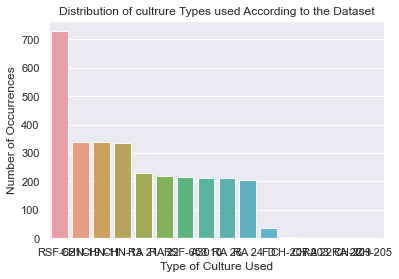

In [ ]:
# Starting with vat_vol, this represents the size of the vat used for the cheese make.

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

culture_code_count = cheeseyield_data['culture_code_1'].value_counts()
sns.set(style="darkgrid")
sns.barplot(culture_code_count.index, culture_code_count.values, alpha=0.9)
plt.title('Distribution of cultrure Types used According to the Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of Culture Used', fontsize=12)
plt.show()

All culture types are fairly well represented, but let's check more details about the missing culture_code_1 values since there are only 7 rows.

In [ ]:
# Let's view what rows are NaN in the vat_vol column

cols_to_ignore_culture = ['3am_temp', '9am_temp', '3pm_temp', 'vat_fill_start_time', 'ltr_milk_total', 'fat_pct_total', 'prt_pct_total', 'prt_fat_ratio', 'anat_qty', 'mould_qty']
nan_in_culture_code = cheeseyield_data.drop(cols_to_ignore_culture, axis=1)
nan_in_culture_code  = nan_in_culture_code[nan_in_culture_code['culture_code_1'].isna()]
nan_in_culture_code.head(7)

,batch_id,prod_date,prod_time,vat_vol,product_category,cheese_type,culture_code_1,culture_qty_1,culture_code_2,culture_qty_2,...,mill_ph,mill_duration,knock_out_ph,wrap_ph,wrap_temp,cheese_weight,yield,grade,prod_month,prod_year
166,167,2022-08-03,03/08/2022 02:55,17K,Blue Cheese,STRA,NaN,NaN,NaN,0,...,NaN,NaN,NaN,4.89,11.2,788.75,131.46,89,8,2022
631,632,2022-02-15,15/02/2022 06:15,10K,Territorial Cheese,RL,NaN,500.0,NaN,0,...,5.21,12.0,5.15,NaN,NaN,1181.95,118.19,89,2,2022
1646,1647,2020-10-05,05/10/2020 09:30,17K,Blue Cheese,BSB,NaN,2000.0,NaN,0,...,NaN,NaN,NaN,4.90,11.6,2206.68,129.80,89,10,2020
1839,1840,2020-07-13,13/07/2020 08:33,17K,Blue Cheese,STRA,NaN,NaN,NaN,0,...,NaN,NaN,NaN,4.94,10.4,770.63,154.13,87,7,2020
1935,1936,2020-06-10,10/06/2020 08:53,17K,Blue Cheese,STRA,NaN,NaN,NaN,0,...,NaN,NaN,NaN,5.01,12.0,611.28,122.25,0,6,2020
2065,2066,2020-04-29,29/04/2020 05:03,17K,Blue Cheese,STRA,NaN,NaN,NaN,0,...,NaN,NaN,NaN,4.89,9.1,703.74,140.75,87,4,2020
2083,2084,2020-04-22,22/04/2020 07:33,17K,Blue Cheese,STRA,NaN,NaN,NaN,0,...,NaN,NaN,NaN,4.97,9.9,717.88,143.58,87,4,2020


In [ ]:
# df_STRA = cheeseyield_data[(cheeseyield_data.cheese_type == 'STRA')]
# df_STRA.head()

##### Let's investigate for Red Leicester

The red leicester in batch_id 632 shows culture_qty_1 = 500, but culture_code_1 is NaN, therefore we shall consider filling in the culture code.

In [ ]:
# Let's check the distribution of culture_code for Red Leicester cheese


<AxesSubplot:title={'center':'Pie Chart of % frequency of culture 1 usage'}, ylabel='None'>

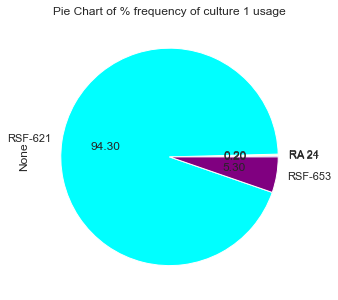

In [ ]:
# Make a pie chart to see the frequency %
# plot = df_RL['culture_code_1'].value_counts().plot.pie(subplots=True, figsize=(5, 5))

df_RL = cheeseyield_data[(cheeseyield_data.cheese_type == 'RL')]
df_RL.groupby('culture_code_1').size().plot(kind='pie', autopct='%.2f', colors=['blue', 'yellow', 'cyan', 'purple'], figsize=(5, 5), title = 'Pie Chart of % frequency of culture 1 usage')

The chart above shows that RSF-621 culture is used 93.24% of the time for Red Leicester cheese, therefore we can safely assume that the same culture will be used for batch_id '632'

In [ ]:
cheeseyield_data.loc[cheeseyield_data['batch_id'] == 632, 'culture_code_1'] = "RSF-621"

In [ ]:
for i,j in zip(cheeseyield_data['cheese_type'], cheeseyield_data['culture_code_1']):
               if i == 'RL' and j is np.nan:
                   print(i,j)

##### Investigate for Blackstick Blue

BSB in batch_id 1647 shows culture_qty_1 = 2000, but culture_code_1 is NaN, therefore we shall consider filling in the culture code.

<AxesSubplot:title={'center':'Pie Chart of % frequency of culture 1 usage'}, ylabel='None'>

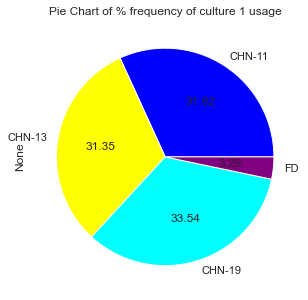

In [ ]:
# Make a pie chart to see the frequency %
# plot = df_RL['culture_code_1'].value_counts().plot.pie(subplots=True, figsize=(5, 5))

df_BSB = cheeseyield_data[(cheeseyield_data.cheese_type == 'BSB')]
df_BSB.groupby('culture_code_1').size().plot(kind='pie', autopct='%.2f', colors=['blue', 'yellow', 'cyan', 'purple'], figsize=(5, 5), title = 'Pie Chart of % frequency of culture 1 usage')

The chart above shows that the three different types of cultures for BSB cheese are fairly distributed, therefore we cannot assume any specific culture. However since it is only 1 column affected, we shall fill in CHN-11 culture.

In [ ]:
cheeseyield_data.loc[cheeseyield_data['batch_id'] == 1647, 'culture_code_1'] = "CHN-11"

##### Investigate for Blackstick Blue

BSB in batch_id 1647 shows culture_qty_1 = 2000, but culture_code_1 is NaN, therefore we shall consider filling in the culture code.

<AxesSubplot:title={'center':'Pie Chart of % frequency of culture 1 usage'}, ylabel='None'>

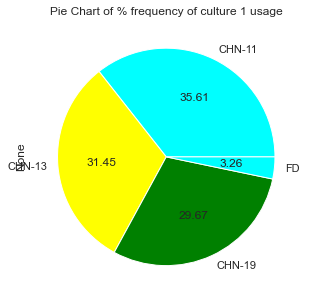

In [ ]:
# Make a pie chart to see the frequency %
# plot = df_RL['culture_code_1'].value_counts().plot.pie(subplots=True, figsize=(5, 5))

df_STRA = cheeseyield_data[(cheeseyield_data.cheese_type == 'STRA')]
df_STRA.groupby('culture_code_1').size().plot(kind='pie', autopct='%.2f', colors=['cyan', 'yellow', 'green',], figsize=(5, 5), title = 'Pie Chart of % frequency of culture 1 usage')

The chart above shows that the three different types of cultures for STRA cheese are fairly distributed, therefore we cannot assume any specific culture. However we shall fill in CHN-11 culture for batch_id 2292 since it shows a qty  500 was used.

In [ ]:
cheeseyield_data.loc[cheeseyield_data['batch_id'] == 2292, 'culture_code_1'] = "CHN-11"

In [ ]:
nan_in_culture_code  = nan_in_culture_code[nan_in_culture_code['culture_code_1'].isna()]
nan_in_culture_code.head(7)

,batch_id,prod_date,prod_time,vat_vol,product_category,cheese_type,culture_code_1,culture_qty_1,culture_code_2,culture_qty_2,...,mill_ph,mill_duration,knock_out_ph,wrap_ph,wrap_temp,cheese_weight,yield,grade,prod_month,prod_year
166,167,2022-08-03,03/08/2022 02:55,17K,Blue Cheese,STRA,NaN,NaN,NaN,0,...,NaN,NaN,NaN,4.89,11.2,788.75,131.46,89,8,2022
631,632,2022-02-15,15/02/2022 06:15,10K,Territorial Cheese,RL,NaN,500.0,NaN,0,...,5.21,12.0,5.15,NaN,NaN,1181.95,118.19,89,2,2022
1646,1647,2020-10-05,05/10/2020 09:30,17K,Blue Cheese,BSB,NaN,2000.0,NaN,0,...,NaN,NaN,NaN,4.90,11.6,2206.68,129.80,89,10,2020
1839,1840,2020-07-13,13/07/2020 08:33,17K,Blue Cheese,STRA,NaN,NaN,NaN,0,...,NaN,NaN,NaN,4.94,10.4,770.63,154.13,87,7,2020
1935,1936,2020-06-10,10/06/2020 08:53,17K,Blue Cheese,STRA,NaN,NaN,NaN,0,...,NaN,NaN,NaN,5.01,12.0,611.28,122.25,0,6,2020
2065,2066,2020-04-29,29/04/2020 05:03,17K,Blue Cheese,STRA,NaN,NaN,NaN,0,...,NaN,NaN,NaN,4.89,9.1,703.74,140.75,87,4,2020
2083,2084,2020-04-22,22/04/2020 07:33,17K,Blue Cheese,STRA,NaN,NaN,NaN,0,...,NaN,NaN,NaN,4.97,9.9,717.88,143.58,87,4,2020


Another check of the empty culture_code_1 col shows there are now only 4 rows with missing values. We will leave these ones empty.

In [ ]:
cheeseyield_data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=True)

prod_time                 0
culture_time              0
vat_fill_start_time       0
rennet_time               0
product_category          0
vat_vol                   0
cheese_type               0
pitch_end_time            4
pitch_start_time          6
culture_code_1           14
turn1_time               28
cut_time                 28
turn2_time              704
turn3_time              790
drainer_vol            1058
salt_time              1059
turned_at_whey_off     1662
scald_start_time       1752
scald_end_time         1763
demould_time           2042
brine_in_time          2048
brine_out_time         2064
culture_code_2         2417
turn4_time             2641
dtype: int64

#### Treating the datetime variables

Datetime variables in the standard format are interpreted by python as objects (categorical vars). We will convert each from categorical variables to datetime variables and evaluate each date time var and define how to treat them.

'prod_date' 2. 'prod_time' 3. 'vat_fill_start_time' 4. 'culture_time' 5. 'rennet_time' 6. 'cut_time' 7. 'scald_start_time' 8. 'scald_end_time' 9. 'pitch_start_time' 10. 'pitch_end_time' 11. 'turn2_time' 12. 'turn3_time' 13. 'turn4_time' 15. 'salt_time' 16. 'demould_time' 17. 'brine_in_time' 18. 'brine_out_time' 19. 'rennet2brine_time'

##### Convert to datetimes and generate timestamp of ocurrence in 'number of seconds'

In [ ]:
cheeseyield_data.columns

Index(['batch_id', 'prod_date', 'prod_time', 'vat_vol', 'product_category',
       'cheese_type', '3am_temp', '9am_temp', '3pm_temp',
       'vat_fill_start_time', 'ltr_milk_total', 'fat_pct_total',
       'prt_pct_total', 'prt_fat_ratio', 'anat_qty', 'mould_qty',
       'culture_code_1', 'culture_qty_1', 'culture_code_2', 'culture_qty_2',
       'culture_time', 'rennet_qty', 'rennet_time', 'rennet_temp', 'rennet_ta',
       'rennet_ph', 'floc_duration', 'cut_time', 'hardn_ratio',
       'scald_start_time', 'scald_end_time', 'scald_temp', 'pitch_ta',
       'pitch_ph', 'temp_at_pitch', 'pitch_start_time', 'pitch_end_time',
       'pitch_duration_time', 'afe_fill_height_start', 'afe_fill_height_end',
       'drainer_vol', 'turned_at_whey_off', 'turn1_time', 'turn1_acidity',
       'turn1_ph', 'turn1_temp', 'turn2_time', 'turn2_acidity', 'turn2_ph',
       'turn3_time', 'turn3_acidity', 'turn3_ph', 'turn4_time',
       'turn4_acidity', 'turn4_ph', 'rennet2cover_time', 'salt_time',
      

Since the Vat fill start time represents the real production start time, then we should drop the production data and time. Also we have previously extracted prod_month and prod_year from the production date, so no need to keep data duplicates.

In [ ]:
# Drop prod_date and prod_time

cols_dropped = ['prod_time', 'prod_date', 'rennet2brine_time']
cheeseyield_data = cheeseyield_data.drop(cols_dropped, axis=1)

In [ ]:
cheeseyield_data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=True)

vat_vol                   0
product_category          0
cheese_type               0
vat_fill_start_time       0
rennet_time               0
culture_time              0
pitch_end_time            4
pitch_start_time          6
culture_code_1           14
cut_time                 28
turn1_time               28
turn2_time              704
turn3_time              790
drainer_vol            1058
salt_time              1059
turned_at_whey_off     1662
scald_start_time       1752
scald_end_time         1763
demould_time           2042
brine_in_time          2048
brine_out_time         2064
culture_code_2         2417
turn4_time             2641
dtype: int64

In [ ]:
cheeseyield_data_cat.columns

Index(['prod_time', 'vat_vol', 'product_category', 'cheese_type',
       'vat_fill_start_time', 'culture_code_1', 'culture_code_2',
       'culture_time', 'rennet_time', 'cut_time', 'scald_start_time',
       'scald_end_time', 'pitch_start_time', 'pitch_end_time', 'drainer_vol',
       'turned_at_whey_off', 'turn1_time', 'turn2_time', 'turn3_time',
       'turn4_time', 'salt_time', 'demould_time', 'brine_in_time',
       'brine_out_time'],
      dtype='object')

In [ ]:
from datetime import datetime
from datetime import time, timedelta

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Convert vat_fill_start_time from str to standard datetime
cheeseyield_data['vat_fill_start_time'] = pd.to_datetime(cheeseyield_data['vat_fill_start_time'], infer_datetime_format=True)
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['vat_fill_start_min'] = cheeseyield_data.vat_fill_start_time.dt.minute
# cheeseyield_data['vat_fill_start_hour'] = cheeseyield_data.vat_fill_start_time.dt.hour
# cheeseyield_data['vat_fill_start_day'] = cheeseyield_data.vat_fill_start_time.dt.day
cheeseyield_data['vat_fill_start_month'] = cheeseyield_data.vat_fill_start_time.dt.month
cheeseyield_data['vat_fill_start_year'] = cheeseyield_data.vat_fill_start_time.dt.year
cheeseyield_data['vat_fill_start_timestamp'] = (pd.datetime.now()-cheeseyield_data['vat_fill_start_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert culture_time from str to standard datetime
cheeseyield_data['culture_time'] = pd.to_datetime(cheeseyield_data['culture_time'], infer_datetime_format=True)
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['culture_app_min'] = cheeseyield_data.culture_time.dt.minute
# cheeseyield_data['culture_app_hour'] = cheeseyield_data.culture_time.dt.hour
# cheeseyield_data['culture_app_day'] = cheeseyield_data.culture_time.dt.day
cheeseyield_data['culture_app_month'] = cheeseyield_data.culture_time.dt.month
cheeseyield_data['culture_app_year'] = cheeseyield_data.culture_time.dt.year
cheeseyield_data['culture_app_timestamp'] = (pd.datetime.now()-cheeseyield_data['culture_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert rennet_time from str to standard datetime
cheeseyield_data['rennet_time'] = pd.to_datetime(cheeseyield_data['rennet_time'], infer_datetime_format=True)
# Create new columns for second, min, hour, day, month and year of the rennet application datetime
# cheeseyield_data['rennet_min'] = cheeseyield_data.rennet_time.dt.minute
# cheeseyield_data['rennet_hour'] = cheeseyield_data.rennet_time.dt.hour
# cheeseyield_data['rennet_day'] = cheeseyield_data.rennet_time.dt.day
cheeseyield_data['rennet_month'] = cheeseyield_data.rennet_time.dt.month
cheeseyield_data['rennet_year'] = cheeseyield_data.rennet_time.dt.year
cheeseyield_data['rennet_app_timestamp'] = (pd.datetime.now()-cheeseyield_data['rennet_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert cut_time from str to standard datetime
cheeseyield_data['cut_time'] = pd.to_datetime(cheeseyield_data['cut_time'], infer_datetime_format=True) #4
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['cuttime_min'] = cheeseyield_data.cut_time.dt.minute
# cheeseyield_data['cuttime_hour'] = cheeseyield_data.cut_time.dt.hour
# cheeseyield_data['cuttime_day'] = cheeseyield_data.cut_time.dt.day
cheeseyield_data['cuttime_month'] = cheeseyield_data.cut_time.dt.month
cheeseyield_data['cuttime_year'] = cheeseyield_data.cut_time.dt.year
cheeseyield_data['cuttime_timestamp'] = (pd.datetime.now()-cheeseyield_data['cut_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert scald_start_time from str to standard datetime
cheeseyield_data['scald_start_time'] = pd.to_datetime(cheeseyield_data['scald_start_time'], infer_datetime_format=True) #17
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['scald_start_min'] = cheeseyield_data.scald_start_time.dt.minute
# cheeseyield_data['scald_start_hour'] = cheeseyield_data.scald_start_time.dt.hour
# cheeseyield_data['scald_start_day'] = cheeseyield_data.scald_start_time.dt.day
cheeseyield_data['scald_start_month'] = cheeseyield_data.scald_start_time.dt.month
cheeseyield_data['scald_start_year'] = cheeseyield_data.scald_start_time.dt.year
cheeseyield_data['scald_start_timestamp'] = (pd.datetime.now()-cheeseyield_data['scald_start_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert scald_end_time from str to standard datetime
cheeseyield_data['scald_end_time'] = pd.to_datetime(cheeseyield_data['scald_end_time'], infer_datetime_format=True) #16
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['scald_end_min'] = cheeseyield_data.scald_end_time.dt.minute
# cheeseyield_data['scald_end_hour'] = cheeseyield_data.scald_end_time.dt.hour
# cheeseyield_data['scald_end_day'] = cheeseyield_data.scald_end_time.dt.day
cheeseyield_data['scald_end_month'] = cheeseyield_data.scald_end_time.dt.month
cheeseyield_data['scald_end_year'] = cheeseyield_data.scald_end_time.dt.year
cheeseyield_data['scald_end_timestamp'] = (pd.datetime.now()-cheeseyield_data['scald_end_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert pitch_start_time from str to standard datetime
cheeseyield_data['pitch_start_time'] = pd.to_datetime(cheeseyield_data['pitch_start_time'], infer_datetime_format=True) #2
# Create new columns for second, min, hour, day, month and year of the pitch start datetime
# cheeseyield_data['pitchstart_min'] = cheeseyield_data.pitch_start_time.dt.minute
# cheeseyield_data['pitchstart_hour'] = cheeseyield_data.pitch_start_time.dt.hour
# cheeseyield_data['pitchstart_day'] = cheeseyield_data.pitch_start_time.dt.day
cheeseyield_data['pitchstart_month'] = cheeseyield_data.pitch_start_time.dt.month
cheeseyield_data['pitchstart_year'] = cheeseyield_data.pitch_start_time.dt.year
cheeseyield_data['pitchstart_timestamp'] = (pd.datetime.now()-cheeseyield_data['pitch_start_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert pitch_end_time from str to standard datetime
cheeseyield_data['pitch_end_time'] = pd.to_datetime(cheeseyield_data['pitch_end_time'], infer_datetime_format=True) #3
# Create new columns for second, min, hour, day, month and year of the pitch end datetime
# cheeseyield_data['pitchend_min'] = cheeseyield_data.pitch_end_time.dt.minute
# cheeseyield_data['pitchend_hour'] = cheeseyield_data.pitch_end_time.dt.hour
# cheeseyield_data['pitchend_day'] = cheeseyield_data.pitch_end_time.dt.day
cheeseyield_data['pitchend_month'] = cheeseyield_data.pitch_end_time.dt.month
cheeseyield_data['pitchend_year'] = cheeseyield_data.pitch_end_time.dt.year
cheeseyield_data['pitchend_timestamp'] = (pd.datetime.now()-cheeseyield_data['pitch_end_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert turn1_time from str to standard datetime
cheeseyield_data['turn1_time'] = pd.to_datetime(cheeseyield_data['turn1_time'], infer_datetime_format=True) #5
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['turn1_min'] = cheeseyield_data.turn1_time.dt.minute
# cheeseyield_data['turn1_hour'] = cheeseyield_data.turn1_time.dt.hour
# cheeseyield_data['turn1_day'] = cheeseyield_data.turn1_time.dt.day
cheeseyield_data['turn1_month'] = cheeseyield_data.turn1_time.dt.month
cheeseyield_data['turn1_year'] = cheeseyield_data.turn1_time.dt.year
cheeseyield_data['turn1_timestamp'] = (pd.datetime.now()-cheeseyield_data['turn1_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert turn2_time from str to standard datetime
cheeseyield_data['turn2_time'] = pd.to_datetime(cheeseyield_data['turn2_time'], infer_datetime_format=True) #6
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['turn2_min'] = cheeseyield_data.turn2_time.dt.minute
# cheeseyield_data['turn2_hour'] = cheeseyield_data.turn2_time.dt.hour
# cheeseyield_data['turn2_day'] = cheeseyield_data.turn2_time.dt.day
cheeseyield_data['turn2_month'] = cheeseyield_data.turn2_time.dt.month
cheeseyield_data['turn2_year'] = cheeseyield_data.turn2_time.dt.year
cheeseyield_data['turn2_timestamp'] = (pd.datetime.now()-cheeseyield_data['turn2_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert turn3_time from str to standard datetime
cheeseyield_data['turn3_time'] = pd.to_datetime(cheeseyield_data['turn3_time'], infer_datetime_format=True) #7
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['turn3_min'] = cheeseyield_data.turn3_time.dt.minute
# cheeseyield_data['turn3_hour'] = cheeseyield_data.turn3_time.dt.hour
# cheeseyield_data['turn3_day'] = cheeseyield_data.turn3_time.dt.day
cheeseyield_data['turn3_month'] = cheeseyield_data.turn3_time.dt.month
cheeseyield_data['turn3_year'] = cheeseyield_data.turn3_time.dt.year
cheeseyield_data['turn3_timestamp'] = (pd.datetime.now()-cheeseyield_data['turn3_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert turn4_time from str to standard datetime
cheeseyield_data['turn4_time'] = pd.to_datetime(cheeseyield_data['turn4_time'], infer_datetime_format=True) #10
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['turn4_min'] = cheeseyield_data.turn4_time.dt.minute
# cheeseyield_data['turn4_hour'] = cheeseyield_data.turn4_time.dt.hour
# cheeseyield_data['turn4_day'] = cheeseyield_data.turn4_time.dt.day
cheeseyield_data['turn4_month'] = cheeseyield_data.turn4_time.dt.month
cheeseyield_data['turn4_year'] = cheeseyield_data.turn4_time.dt.year
cheeseyield_data['turn4_timestamp'] = (pd.datetime.now()-cheeseyield_data['turn4_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert salt_time from str to standard datetime
cheeseyield_data['salt_time'] = pd.to_datetime(cheeseyield_data['salt_time'], infer_datetime_format=True) #8
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['salt_min'] = cheeseyield_data.salt_time.dt.minute
# cheeseyield_data['salt_hour'] = cheeseyield_data.salt_time.dt.hour
# cheeseyield_data['salt_day'] = cheeseyield_data.salt_time.dt.day
cheeseyield_data['salt_month'] = cheeseyield_data.salt_time.dt.month
cheeseyield_data['salt_year'] = cheeseyield_data.salt_time.dt.year
cheeseyield_data['salt_timestamp'] = (pd.datetime.now()-cheeseyield_data['salt_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert demould_time from str to standard datetime
cheeseyield_data['demould_time'] = pd.to_datetime(cheeseyield_data['demould_time'], infer_datetime_format=True) #9
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['demould_min'] = cheeseyield_data.demould_time.dt.minute
# cheeseyield_data['demould_hour'] = cheeseyield_data.demould_time.dt.hour
# cheeseyield_data['demould_day'] = cheeseyield_data.demould_time.dt.day
cheeseyield_data['demould_month'] = cheeseyield_data.demould_time.dt.month
cheeseyield_data['demould_year'] = cheeseyield_data.demould_time.dt.year
cheeseyield_data['demould_timestamp'] = (pd.datetime.now()-cheeseyield_data['demould_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert brine_in_time from str to standard datetime
cheeseyield_data['brine_in_time'] = pd.to_datetime(cheeseyield_data['brine_in_time'], infer_datetime_format=True) #11
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['turn4_min'] = cheeseyield_data.brine_in_time.dt.minute
# cheeseyield_data['brine_in__hour'] = cheeseyield_data.brine_in_time.dt.hour
# cheeseyield_data['brine_in__day'] = cheeseyield_data.brine_in_time.dt.day
cheeseyield_data['brine_in__month'] = cheeseyield_data.brine_in_time.dt.month
cheeseyield_data['brine_in__year'] = cheeseyield_data.brine_in_time.dt.year
cheeseyield_data['brine_in__timestamp'] = (pd.datetime.now()-cheeseyield_data['brine_in_time']).dt.total_seconds() # Convert the datetime to seconds

# Convert brine_out_time from str to standard datetime
cheeseyield_data['brine_out_time'] = pd.to_datetime(cheeseyield_data['brine_out_time'], infer_datetime_format=True) #12
# Create new columns for second, min, hour, day, month and year of the cut time datetime
# cheeseyield_data['brine_out_min'] = cheeseyield_data.brine_out_time.dt.minute
# cheeseyield_data['brine_out_hour'] = cheeseyield_data.brine_out_time.dt.hour
# cheeseyield_data['brine_out_day'] = cheeseyield_data.brine_out_time.dt.day
cheeseyield_data['brine_out_month'] = cheeseyield_data.brine_out_time.dt.month
cheeseyield_data['brine_out_year'] = cheeseyield_data.brine_out_time.dt.year
cheeseyield_data['brine_out_timestamp'] = (pd.datetime.now()-cheeseyield_data['brine_out_time']).dt.total_seconds() # Convert the datetime to seconds

cheeseyield_data.head(3)

,batch_id,vat_vol,product_category,cheese_type,3am_temp,9am_temp,3pm_temp,vat_fill_start_time,ltr_milk_total,fat_pct_total,...,salt_timestamp,demould_month,demould_year,demould_timestamp,brine_in__month,brine_in__year,brine_in__timestamp,brine_out_month,brine_out_year,brine_out_timestamp
9,10,12K,Territorial Cheese,CRMY,19.1,20.7,21.2,2022-10-17 02:00:00,12000.0,4.26,...,3.202466e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,10K,Territorial Cheese,CRBLY,18.8,22.3,21.9,2022-10-14 06:35:00,11505.0,4.25,...,3.226616e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12,12K,Territorial Cheese,CRBLY,18.8,22.3,21.9,2022-10-14 03:00:00,12000.0,4.17,...,3.228248e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using cheeseyield_data.head(3), the table allows us to view the new columns created for datetime and timestamps feature engineering. Below we can also see that all the datetime variables no longer appear as categorical variables.

In [ ]:
cheeseyield_data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=True)

vat_vol                  0
product_category         0
cheese_type              0
culture_code_1          14
drainer_vol           1058
turned_at_whey_off    1662
culture_code_2        2417
dtype: int64

##### Interractions between timestamps of different activities

In order to inform the model of how one activity affect another in the cheese making process,

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create vat2culture_time
cheeseyield_data['vat2culture_time'] = cheeseyield_data['vat_fill_start_timestamp'] - cheeseyield_data['culture_app_timestamp']

# Create culture2rennet_time
cheeseyield_data['culture2rennet_time'] = cheeseyield_data['culture_app_timestamp'] - cheeseyield_data['rennet_app_timestamp']

# Create culture2rennet_time
cheeseyield_data['culture2rennet_time'] = cheeseyield_data['culture_app_timestamp'] - cheeseyield_data['rennet_app_timestamp']

# Create rennet2cut_time
cheeseyield_data['rennet2cut_time'] = cheeseyield_data['rennet_app_timestamp'] - cheeseyield_data['cuttime_timestamp']

# Create cut2scald_time
cheeseyield_data['cut2scald_time'] = cheeseyield_data['cuttime_timestamp'] - cheeseyield_data['scald_start_timestamp']

# Create scald_duration
cheeseyield_data['scald_duration'] = cheeseyield_data['scald_start_timestamp'] - cheeseyield_data['scald_end_timestamp']

# Create pitch_duration
cheeseyield_data['pitch_duration'] = cheeseyield_data['pitchstart_timestamp'] - cheeseyield_data['pitchend_timestamp']

# Create pitch2turn1_duration
cheeseyield_data['pitch2turn1_duration'] = cheeseyield_data['pitchend_timestamp'] - cheeseyield_data['turn1_timestamp']

# Create pitch2salt_time
cheeseyield_data['pitch2salt_time'] = cheeseyield_data['pitchend_timestamp'] - cheeseyield_data['salt_timestamp']

cheeseyield_data.head(3)

,batch_id,vat_vol,product_category,cheese_type,3am_temp,9am_temp,3pm_temp,vat_fill_start_time,ltr_milk_total,fat_pct_total,...,brine_out_year,brine_out_timestamp,vat2culture_time,culture2rennet_time,rennet2cut_time,cut2scald_time,scald_duration,pitch_duration,pitch2turn1_duration,pitch2salt_time
9,10,12K,Territorial Cheese,CRMY,19.1,20.7,21.2,2022-10-17 02:00:00,12000.0,4.26,...,NaN,NaN,1199.985034,4319.986064,NaN,NaN,1979.993021,3839.989032,1799.989031,5099.95997
10,11,10K,Territorial Cheese,CRBLY,18.8,22.3,21.9,2022-10-14 06:35:00,11505.0,4.25,...,NaN,NaN,-0.014966,5399.986064,2399.986044,NaN,NaN,4799.989032,3299.989031,8399.95997
11,12,12K,Territorial Cheese,CRBLY,18.8,22.3,21.9,2022-10-14 03:00:00,12000.0,4.17,...,NaN,NaN,-0.014966,5399.986064,2399.986044,NaN,NaN,4439.989032,2759.989031,5339.95997


In [ ]:
# assert len(cheeseyield_data[cheeseyield_data['culture_code_1'] == 'not given']) == cheeseyield_data[
#     cheeseyield_data['culture_code_1'].isin(['not given'])
# ]['culture_code_1'].count()

#### Feature Engineering for the numerical variables

In [ ]:
cheeseyield_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 9 to 3225
Columns: 138 entries, batch_id to pitch2salt_time
dtypes: datetime64[ns](16), float64(104), int64(11), object(7)
memory usage: 3.3+ MB


In [ ]:
cheeseyield_data.corr()['pitch_duration_time'].sort_values(ascending=False).head(20)

pitch_duration_time    1.000000
pitch_duration         1.000000
ltr_milk_total         0.300157
cheese_weight          0.238943
rennet_qty             0.235503
turn3_ph               0.229393
culture_qty_1          0.212708
floc_duration          0.206502
rennet2cut_time        0.204070
turn2_ph               0.199537
prt_pct_total          0.193885
fat_pct_total          0.179732
pitchstart_year        0.169385
pitch_ph               0.168799
mould_qty              0.161269
rennet_ph              0.157774
anat_qty               0.155258
demould_ph             0.091371
cheese_ph_at_brine     0.086681
turn2_timestamp        0.081734
Name: pitch_duration_time, dtype: float64

Drop all colums with datetime type, start and end timestamps, years (except production year)

In [ ]:
cheeseyield_data.select_dtypes(include=['datetime64']).columns

Index(['vat_fill_start_time', 'culture_time', 'rennet_time', 'cut_time',
       'scald_start_time', 'scald_end_time', 'pitch_start_time',
       'pitch_end_time', 'turn1_time', 'turn2_time', 'turn3_time',
       'turn4_time', 'salt_time', 'demould_time', 'brine_in_time',
       'brine_out_time'],
      dtype='object')

In [ ]:
# Drop datetime

datetime_drop = ['vat_fill_start_time', 'culture_time', 'rennet_time', 'cut_time', 'scald_start_time', 'scald_end_time',
                 'pitch_start_time', 'pitch_end_time', 'turn1_time', 'turn2_time', 'turn3_time', 'turn4_time',
                 'salt_time', 'demould_time', 'brine_in_time', 'brine_out_time']
cheeseyield_data = cheeseyield_data.drop(datetime_drop, axis=1)

In [ ]:
# Check correlation between years extracted from all the datetimes

cheeseyield_data.corr()['prod_year'].sort_values(ascending=False).head(20)

prod_year              1.000000
turn2_year             1.000000
turn4_year             1.000000
turn1_year             1.000000
salt_year              1.000000
pitchend_year          1.000000
pitchstart_year        1.000000
scald_end_year         1.000000
scald_start_year       1.000000
brine_in__year         1.000000
brine_out_year         1.000000
cuttime_year           1.000000
rennet_year            1.000000
culture_app_year       1.000000
vat_fill_start_year    1.000000
turn3_year             1.000000
demould_year           0.955762
bt_pH_start            0.646630
grade                  0.639232
bt_pH_end              0.466484
Name: prod_year, dtype: float64

In [ ]:
# Drop duplicated years

dupl_year_drop = ['cuttime_year', 'vat_fill_start_year', 'salt_year', 'turn4_year', 'turn3_year',
                  'brine_in__year', 'turn2_year', 'brine_out_year', 'turn1_year', 'pitchend_year', 'culture_app_year',
                  'pitchstart_year', 'rennet_year', 'scald_end_year', 'scald_start_year', 'demould_year']
cheeseyield_data = cheeseyield_data.drop(dupl_year_drop, axis=1)

In [ ]:
# Check correlation between months extracted from all the datetimes

cheeseyield_data.corr()['prod_month'].sort_values(ascending=False).head(20)

vat_fill_start_month    1.000000
cuttime_month           1.000000
turn2_month             1.000000
turn1_month             1.000000
pitchend_month          1.000000
pitchstart_month        1.000000
scald_end_month         1.000000
scald_start_month       1.000000
turn4_month             1.000000
turn3_month             1.000000
prod_month              1.000000
culture_app_month       1.000000
rennet_month            0.999985
brine_in__month         0.998608
salt_month              0.998145
brine_out_month         0.997311
demould_month           0.997034
hardn_ratio             0.202973
9am_temp                0.194414
3pm_temp                0.160165
Name: prod_month, dtype: float64

In [ ]:
# Drop duplicated columns

dupl_month_drop = ['scald_start_month', 'turn4_month', 'scald_end_month', 'cuttime_month', 'pitchstart_month', 'pitchend_month',
                  'culture_app_month', 'turn1_month', 'vat_fill_start_month', 'turn2_month', 'turn3_month', 'rennet_month', 'salt_month', 'pitch_duration', 'grade']
cheeseyield_data = cheeseyield_data.drop(dupl_month_drop, axis=1)

In [ ]:
cheeseyield_data.vat_vol.unique()

array(['12K', '10K', '17K'], dtype=object)

In [ ]:
# Change vat volume from str to numerical

cheeseyield_data['vat_vol'] = cheeseyield_data['vat_vol'].replace('12K', 12)
cheeseyield_data['vat_vol'] = cheeseyield_data['vat_vol'].replace('17K', 17)
cheeseyield_data['vat_vol'] = cheeseyield_data['vat_vol'].replace('10K', 10)

In [ ]:
cheeseyield_data.turned_at_whey_off.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# ax = sns.countplot(x='turned_at_whey_off', data=X, order=X['turned_at_whey_off'].value_counts().index)
# plt.title('Distribution by Turned at Whey Off')
# plt.show()

In [ ]:
cheeseyield_data.turned_at_whey_off.isna().describe()

count     3096
unique       2
top       True
freq      1662
Name: turned_at_whey_off, dtype: object

In [ ]:
#Replace the string variables in 'turned at whey off - yes/no' with 1 and 0;
decisions = {'Yes': 1,'No': 0, np.nan: np.nan}
cheeseyield_data['turned_at_whey_off'] = [decisions[item] for item in cheeseyield_data['turned_at_whey_off']]

In [ ]:
cheeseyield_data.turned_at_whey_off.unique()

array([ 0.,  1., nan])

In [ ]:
cheeseyield_data.to_excel(r'C:\Users\giwa.iziomo\PycharmProjects\Cheesemake_model\Cheese Make Data Set_Feature Engeering_yield.xlsx', index = False)

### ML Model
#### Predictive model for cheese grade

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##### Base Model - Regression

In [ ]:
X = cheeseyield_data.drop(['yield'], axis=1)
y = cheeseyield_data['yield']

# Split dataset into train and test, and maintain cheese proportions in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['product_category'])

In [ ]:
X_train.shape, X_test.shape

((2476, 90), (620, 90))

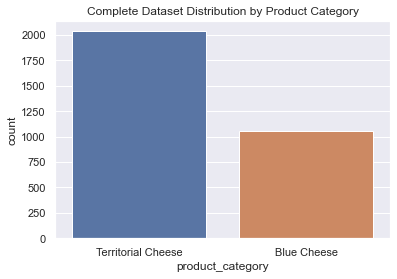

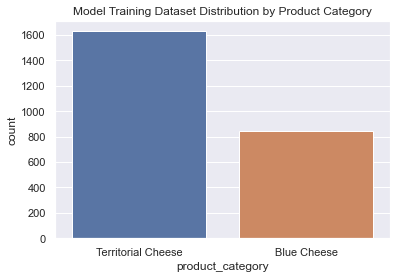

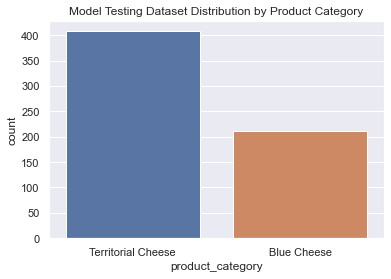

In [ ]:
ax = sns.countplot(x='product_category', data=X, order=X['product_category'].value_counts().index)
plt.title('Complete Dataset Distribution by Product Category')
plt.show()

ax = sns.countplot(x='product_category', data=X_train, order=X['product_category'].value_counts().index)
plt.title('Model Training Dataset Distribution by Product Category')
plt.show()

ax = sns.countplot(x='product_category', data=X_test, order=X['product_category'].value_counts().index)
plt.title('Model Testing Dataset Distribution by Product Category')
plt.show()

In [ ]:
X_train.head(3)

,batch_id,vat_vol,product_category,cheese_type,3am_temp,9am_temp,3pm_temp,ltr_milk_total,fat_pct_total,prt_pct_total,...,brine_in__timestamp,brine_out_month,brine_out_timestamp,vat2culture_time,culture2rennet_time,rennet2cut_time,cut2scald_time,scald_duration,pitch2turn1_duration,pitch2salt_time
434,435,12,Territorial Cheese,CRBLY,22.5,25.1,25.3,12000.0,4.36,3.49,...,NaN,NaN,NaN,899.985034,5399.986064,2399.986044,NaN,NaN,1799.989031,4499.95997
2558,2559,12,Territorial Cheese,CRMY,24.9,26.9,27.0,12000.0,4.35,3.42,...,NaN,NaN,NaN,1799.985034,3599.986064,3599.986044,299.990992,2639.993021,2699.989031,6899.95997
1286,1287,10,Territorial Cheese,TRAD,20.8,20.9,21.6,10000.0,4.44,3.51,...,NaN,NaN,NaN,899.985034,3599.986064,3419.986044,NaN,NaN,899.989031,68399.95997


In [ ]:
# Create numerical pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('encoder', OneHotEncoder())
])

In [ ]:
cheeseyield_data.select_dtypes(include=['object']).columns

Index(['product_category', 'cheese_type', 'culture_code_1', 'culture_code_2',
       'drainer_vol'],
      dtype='object')

In [ ]:
# Select numeric columns
numeric_features = X.select_dtypes(include=[np.number]).columns

# Select categorical columns
categorical_features = ['product_category', 'cheese_type', 'culture_code_1', 'culture_code_2', 'drainer_vol']

In [ ]:
# Combine numeric and categorical columns into ColumnTransformer preprocessor
preprocessor = ColumnTransformer(
   transformers=[
       ('numeric', numeric_transformer, numeric_features),
       ('categorical', categorical_transformer, categorical_features)
    ]
)

In [ ]:
regressors = [
    MLPRegressor(),
    RandomForestRegressor()
]

for regressor in regressors:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    model = pipeline.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(regressor)
    print(f'Model r2 score: {r2_score(y_test, predictions)}')
    print(f'RMSE: {mean_squared_error(y_test, predictions, squared=False)}\n')

MLPRegressor()
Model r2 score: 0.6153640482301075
RMSE: 10.116249745870942

RandomForestRegressor()
Model r2 score: 0.8957893892276898
RMSE: 5.265632864914203



#### Hyperpparameter tuning

In [ ]:
# Cross-validated randomized hyperparameter search
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'regressor__n_estimators': n_estimators,
               'regressor__max_features': max_features,
               'regressor__max_depth': max_depth,
               'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf,
               'regressor__bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf),
])

# Random search of parameters, using 10 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=random_grid,
    n_iter=50,
    cv=10,
    verbose=3,
    random_state=42,
    n_jobs=-1

)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['batch_id', 'vat_vol', '3am_temp', '9am_temp', '3pm_temp',
       'ltr_milk_total', 'fat_pct_total', 'prt_pct_total', 'prt_fat_ratio',
       'anat_qty', 'mould_qty',...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'regressor__bootstrap': 

In [ ]:
set_config(display="diagram")
rf_random

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['batch_id', 'vat_vol', '3am_temp', '9am_temp', '3pm_temp',
       'ltr_milk_total', 'fat_pct_total', 'prt_pct_total', 'prt_fat_ratio',
       'anat_qty', 'mould_qty',...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'regressor__bootstrap': [True, False],
                                        'regressor__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110,
                                                                 None],
                                        'regressor__max_features': ['auto',
                                                                    'sqrt'],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__n_estimators': [200, 400,
                                                                    600, 800,
                                                                    1000, 1200,
                                                                    1400, 1600,
                                                                    1800,
                                                                    2000]},
                   random_state=42, verbose=3)

In [ ]:
print('Best Hyperparameters: %s' % rf_random.best_params_)

Best Hyperparameters: {'regressor__n_estimators': 400, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 30, 'regressor__bootstrap': True}


In [ ]:
def evaluate(pipeline, X_train, y_train, X_test, y_test):
    print('Model train accuracy: {:0.2f}%'.format(pipeline.score(X_train, y_train) * 100))
    print('Model test accuracy: {:0.2f}%'.format(pipeline.score(X_test, y_test) * 100))

In [ ]:
evaluate(rf_random, X_train, y_train, X_test, y_test)

Model train accuracy: 90.44%
Model test accuracy: 60.15%


In [ ]:
# X_test.iloc[0].head(60)

In [ ]:
cheeseyield_data.to_excel(r'C:\Users\giwa.iziomo\PycharmProjects\Cheesemake_model_ yield\Cheese_make_model3.xlsx', index = False)

In [ ]:
to_predict = pd.read_csv(r'C:\Users\giwa.iziomo\PycharmProjects\Cheesemake_model_ yield\real3.csv')

In [ ]:
to_predict

,batch_id,vat_vol,product_category,cheese_type,3am_temp,9am_temp,3pm_temp,ltr_milk_total,fat_pct_total,prt_pct_total,...,brine_in__timestamp,brine_out_month,brine_out_timestamp,vat2culture_time,culture2rennet_time,rennet2cut_time,cut2scald_time,scald_duration,pitch2turn1_duration,pitch2salt_time
0,220,12,Territorial Cheese,CRBLY,22.4,23.9,22.8,10074,4.44,3.5,...,NaN,NaN,NaN,-0.014966,5399.986064,2399.986044,NaN,NaN,2099.989031,3899.95997


In [ ]:
actual = to_predict['yield'].iloc[0]
actual

116.86

In [ ]:
# pred = rf_random.predict(to_predict).item()
# print(f'Prediction: {round(pred, 5)}')
# print(f'Actual: {round(y_test.iloc[0], 5)}')
# print(f'Error: {round(abs(pred - y_test.iloc[0]), 5)}')

pred = rf_random.predict(to_predict).item()
print(f'Prediction: {round(pred, 5)}')
print(f'Actual: {round(actual, 5)}')
print(f'Error: {abs(pred - actual)}')
print(f'percentage error: {round(abs(pred - actual)/(y_test.iloc[0])*100, 2)}%')

Prediction: 118.61672
Actual: 116.86
Error: 1.7567198863636975
percentage error: 1.57%


#### Random Forest Feature Importances

In [ ]:
categorical_feature_names = rf_random.best_estimator_.named_steps["preprocessor"].transformers_[1][1]\
   .named_steps['encoder'].get_feature_names(categorical_features)

C:\Users\giwa.iziomo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
numerical_feature_names = rf_random.best_estimator_.named_steps["preprocessor"].transformers_[0][2].to_numpy()

In [ ]:
feature_names = np.concatenate((categorical_feature_names, numerical_feature_names))

In [ ]:
tree_feature_importances = rf_random.best_estimator_[-1].feature_importances_

In [ ]:
feature_scores = pd.Series(tree_feature_importances, index=feature_names).sort_values(ascending=False)

C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_13584\3935121401.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=False, which='major', color='black', linewidth=0.175)


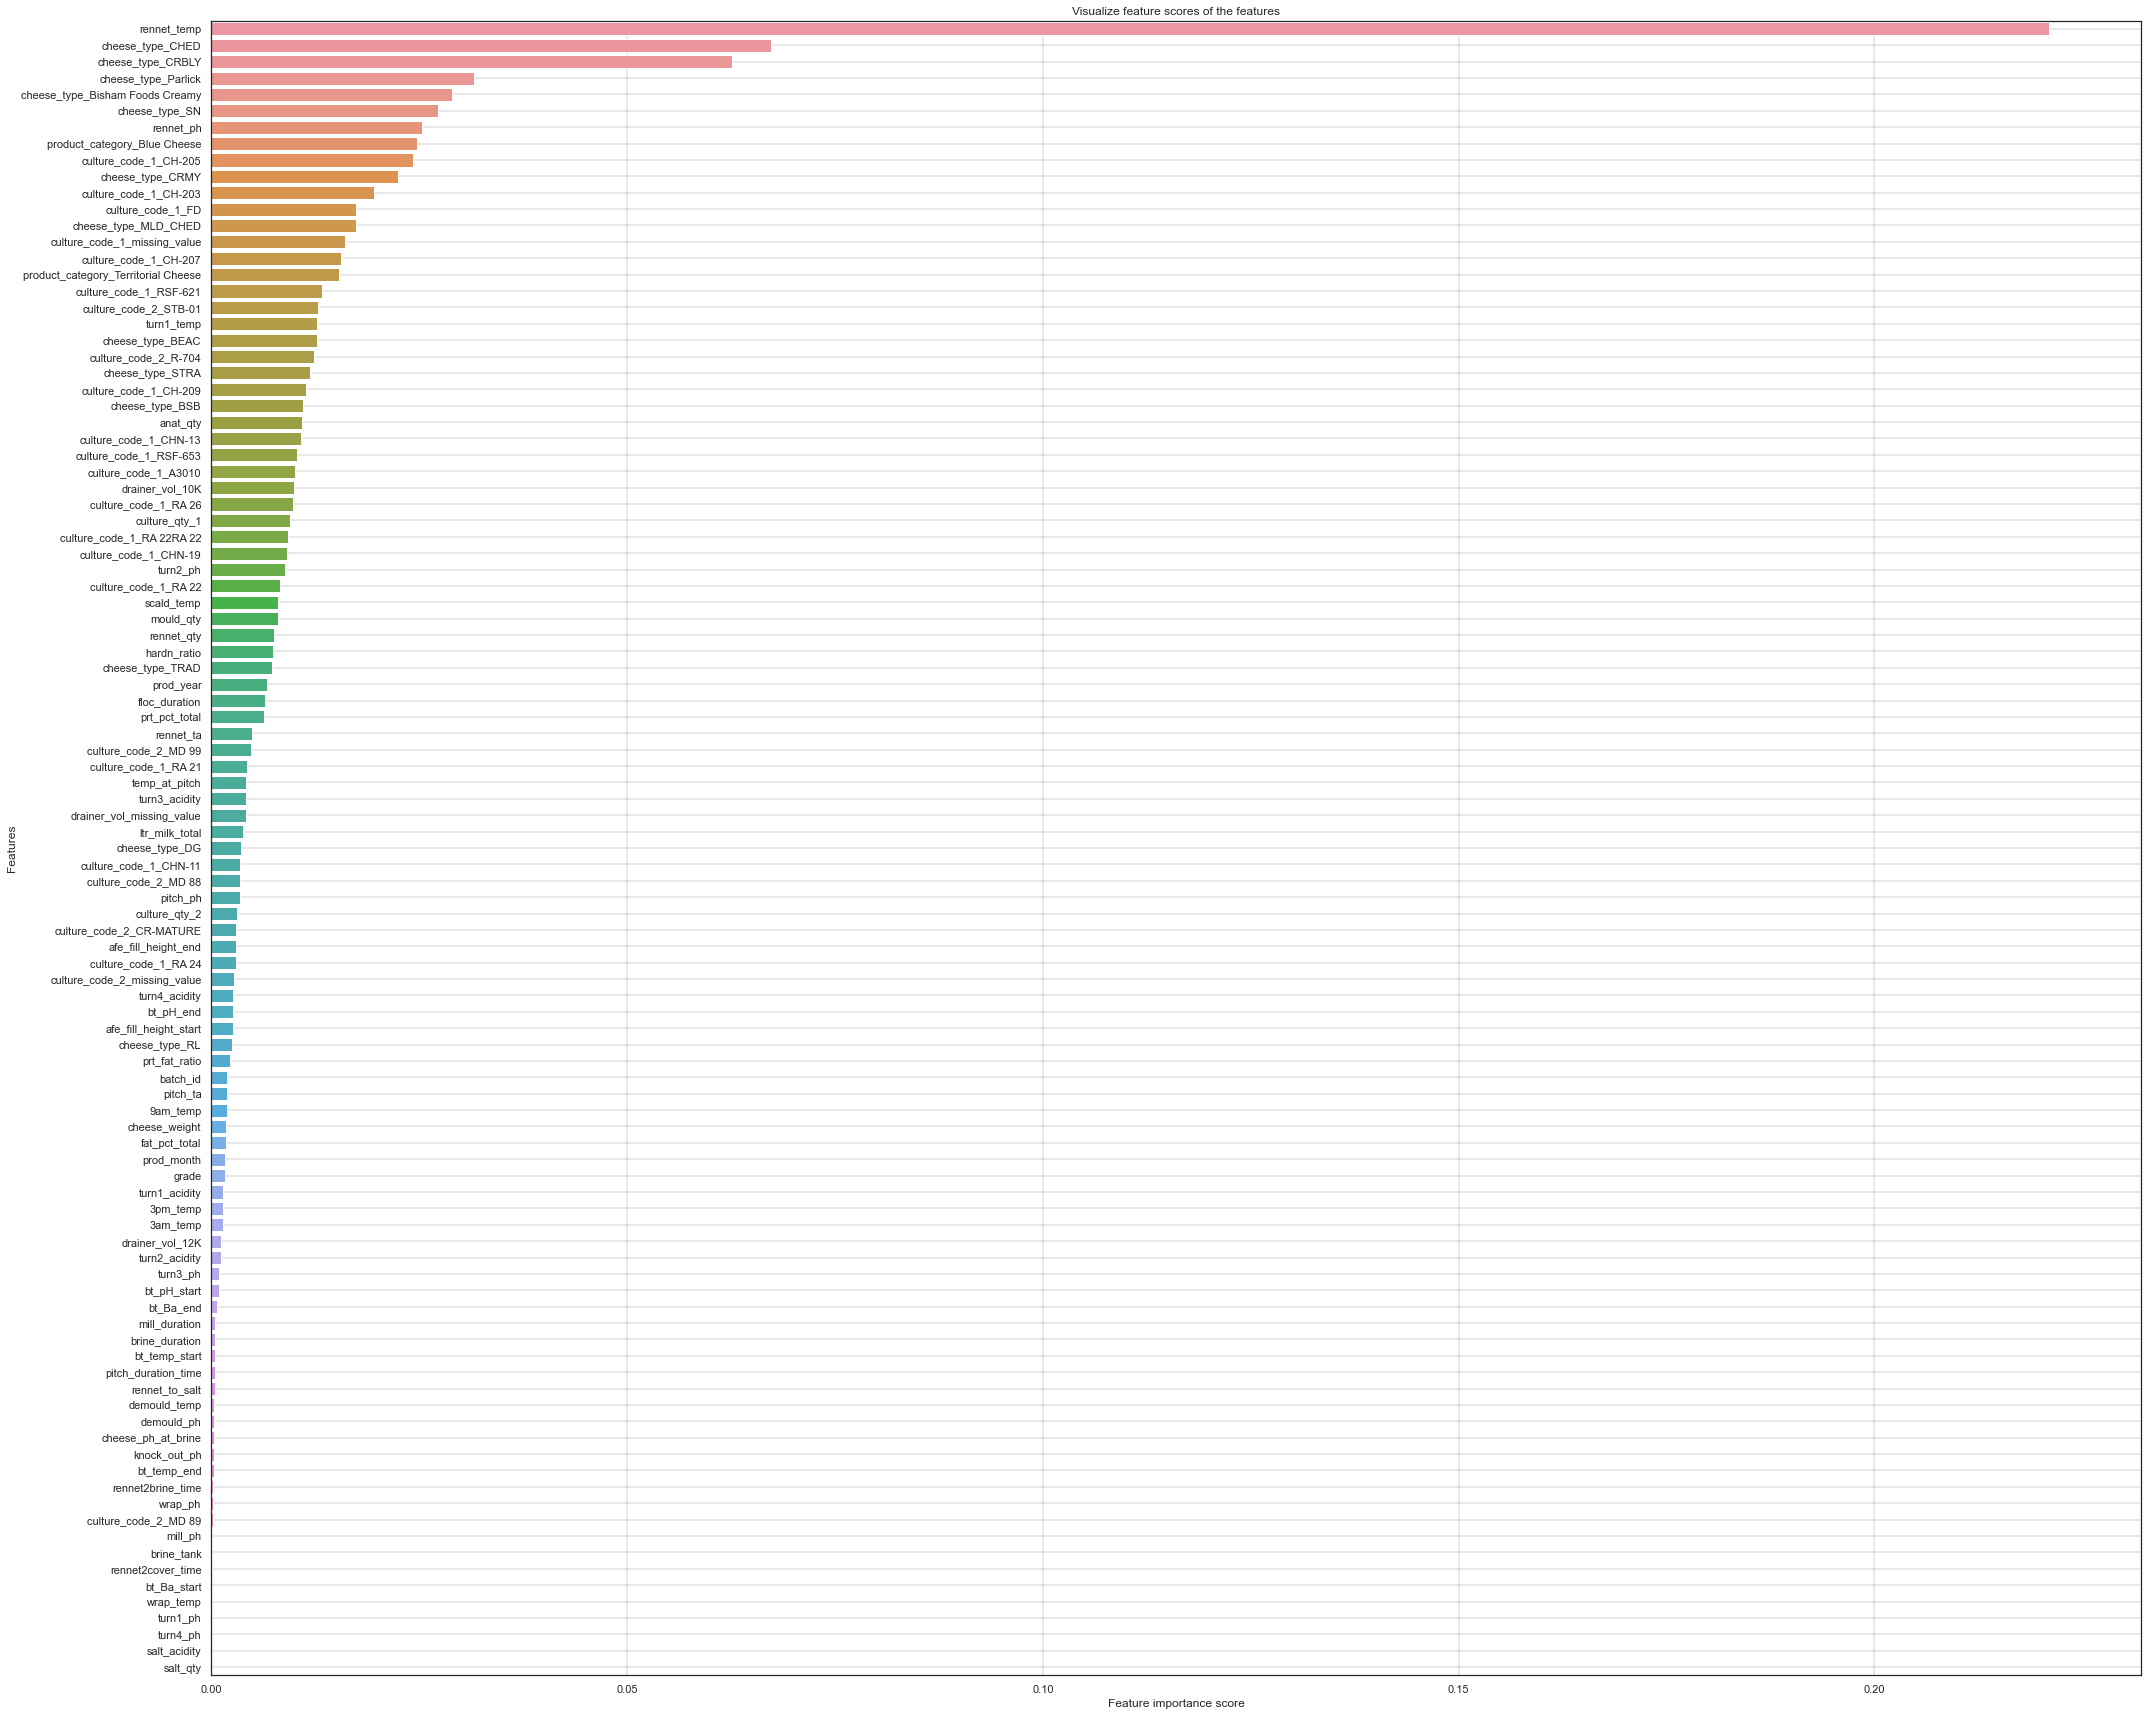

In [ ]:
import seaborn as sns; sns.set(style="white", color_codes=True)
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=X_train)
ax.grid(b=True, which='major', color='black', linewidth=0.175)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.tight_layout()
plt.show()

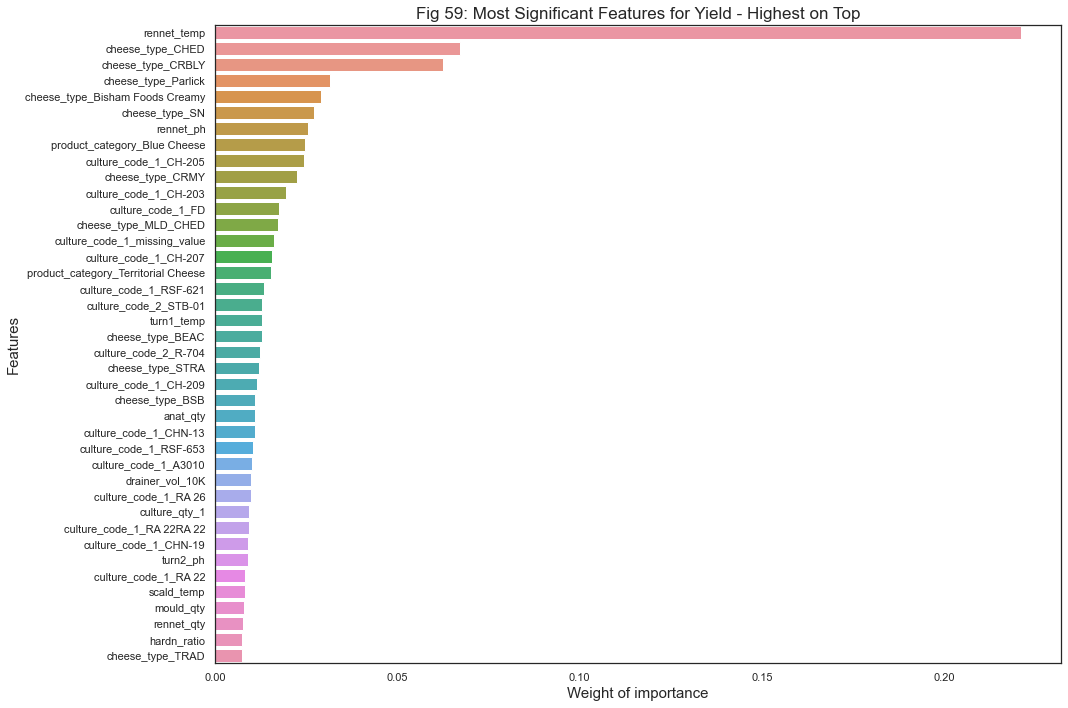

In [ ]:
ignore_last = 61
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x=feature_scores[:-ignore_last], y=feature_scores.index[:-ignore_last], data=X_train)
# ax.grid(b=True, which='major', color='black', linewidth=0.275)
ax.set_title("Fig 59: Most Significant Features for Yield - Highest on Top", size=17)
ax.set_yticklabels(feature_scores.index[:-ignore_last])
ax.set_xlabel("Weight of importance", size=15)
ax.set_ylabel("Features", size=15)
plt.tight_layout()
plt.savefig(f'C:\\Users\\giwa.iziomo\\PycharmProjects\\Cheesemake_model\\Viktor\\Sent\\Attachment 1\\graphics\\yield_sig_var.jpeg', dpi=350)
plt.show()

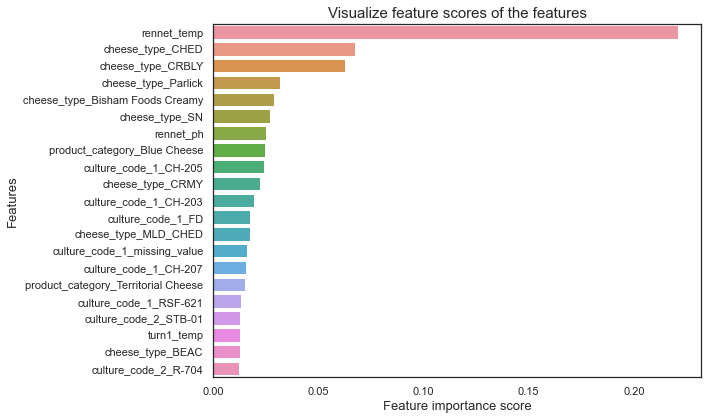

In [ ]:
ignore_last = 80
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=feature_scores[:-ignore_last], y=feature_scores.index[:-ignore_last], data=X_train)
ax.set_title("Visualize feature scores of the features", size=15)
ax.set_yticklabels(feature_scores.index[:-ignore_last])
ax.set_xlabel("Feature importance score", size=13)
ax.set_ylabel("Features", size=13)
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

# Permutation importance
result = permutation_importance(
    rf_random, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx]
)
ax.set_title("Permutation Importances (train set)")
plt.tight_layout()
plt.show()